# Feature selection Complexity evaluation (including univariate ranking): Artificial datasets

In [1]:
import pandas as pd
import copy
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from skrebate import ReliefF
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import glob
import re



In [2]:
import os
os.chdir("..")
root_path = os.getcwd()

In [36]:
# # Cargar la tabla de comparación del dataset
# comparison_table = pd.read_csv("Results_FS_ComplexityEvaluation_WithUnivariate/ArtificialDataset1_comparisonTable.csv", index_col=[1])
#
# display(comparison_table.iloc[:,1:].style.background_gradient(cmap="viridis"))

In [4]:
# Leer todos los comparison.csv de la carpeta
files = glob.glob("Results_FS_ComplexityEvaluation_WithUnivariate/*_comparisonTable.csv")

all_tables = []
for f in files:
    df = pd.read_csv(f, index_col=[1])
    all_tables.append(df)

comparison_all = pd.concat(all_tables)
comparison_all.head()


,Dataset,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,...,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,,
all,ArtificialDataset13,0.219333,0.303600,0.282100,0.572650,0.446437,0.274148,0.490742,0.997935,0.997733,...,0.875918,0.997939,0.410116,115.0,0.729542,0.832333,0.076004,0.713517,0.823720,0.079854
informative,ArtificialDataset13,0.154667,0.258200,0.321204,0.590860,0.452713,0.232287,0.477267,0.997368,0.997920,...,0.893540,0.992335,0.370419,25.0,0.754208,0.874333,0.089601,0.735076,0.869020,0.100875
informative+redundant,ArtificialDataset13,0.208333,0.284733,0.294066,0.542079,0.441277,0.246267,0.482888,0.997663,0.997648,...,0.892600,0.996364,0.349135,55.0,0.738708,0.855000,0.083483,0.721438,0.848395,0.091266
informative+redundant_nonLinear,ArtificialDataset13,0.210667,0.284267,0.281780,0.602611,0.455501,0.263774,0.482723,0.997637,0.997739,...,0.858223,0.994968,0.430147,55.0,0.736833,0.824667,0.068383,0.720896,0.815915,0.072174
informative+noise,ArtificialDataset13,0.240333,0.364133,0.305211,0.562383,0.455043,0.331338,0.493723,0.998632,0.997982,...,0.892950,0.996361,0.385616,55.0,0.717792,0.810667,0.061600,0.695234,0.799405,0.068320


## Artificial Dataset 1

- Nº muestras: 1000
- Características: 10 informativas, 2 ruido, 4 redundantes lineales, 2 redundantes no lineales --> 18 en total
- Separabilidad (class_sep): 1 (alta)
- Ruido en etiquetas (flip_y): 0
- Clusters/clase: 1
- Balance de clases: [0.5, 0.5] (equilibrado)
- Ruido adicional (noise_std): 0.01

In [5]:
# comparison_all.loc['ArtificialDataset1']
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset1'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.053000,0.067600,0.014592,0.683000,0.130850,0.051136,0.400369,0.957305,0.974167,0.699320,0.866140,0.985462,0.827546,18.000000,0.954125,0.985000,0.032024,0.954123,0.985000,0.032027
informative,0.030000,0.051000,0.016597,0.599091,0.146010,0.033283,0.373701,0.944228,0.974700,0.719968,0.865999,0.975724,0.695393,10.000000,0.957750,0.990000,0.032849,0.957746,0.990000,0.032855
informative+redundant,0.034000,0.052600,0.071380,0.634091,0.160102,0.033033,0.372805,0.944834,0.971857,0.711572,0.864111,0.979582,0.213365,14.000000,0.953250,0.985000,0.038362,0.953246,0.985000,0.038367
informative+redundant_nonLinear,0.033000,0.053800,0.044297,0.645200,0.122669,0.034333,0.378490,0.954427,0.973750,0.710909,0.865144,0.979384,0.720168,12.000000,0.956875,0.988000,0.032162,0.956874,0.988000,0.032162
informative+noise,0.042000,0.066400,0.098407,0.550667,0.141574,0.043424,0.407718,0.962517,0.978167,0.714058,0.869268,0.980667,0.664564,12.000000,0.953625,0.985000,0.034924,0.953623,0.985000,0.034926
informative+rand_extra,0.041000,0.061600,0.115777,0.651909,0.156166,0.048252,0.389093,0.950224,0.971462,0.707112,0.863603,0.981070,0.806370,13.000000,0.955625,0.988000,0.034554,0.955624,0.988000,0.034554
mutual_info_top10,0.062000,0.078000,0.079583,0.535615,0.138735,0.073167,0.364963,0.951343,0.959200,0.712907,0.855390,0.971559,0.487987,10.000000,0.934125,0.966000,0.025637,0.934118,0.965999,0.025636
f_classif_top10,0.085000,0.101400,0.121962,0.569000,0.156301,0.078262,0.379290,0.949639,0.964400,0.716112,0.859184,0.975532,0.568725,10.000000,0.925875,0.953000,0.026068,0.925867,0.952989,0.026066
rf_top10,0.054000,0.056800,0.075895,0.588833,0.134775,0.050867,0.353003,0.934391,0.960600,0.710776,0.855915,0.970964,0.529653,10.000000,0.945375,0.974000,0.026457,0.945374,0.974000,0.026457


## Artificial Dataset 2

 - Nº muestras: 1000
 - Características: 10 informativas, 2 ruido, 4 redundantes lineales, 2 redundantes no lineales --> 18 en total
 - Separabilidad (class_sep): 0.6 (más difícil de separar)
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.01

In [6]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset2'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.119000,0.124600,0.017584,0.586462,0.223553,0.095390,0.422998,0.975741,0.982056,0.716353,0.871027,0.985812,0.514070,18.000000,0.901250,0.967000,0.049471,0.901239,0.966999,0.049477
informative,0.078000,0.107400,0.088088,0.593333,0.249648,0.067752,0.402904,0.971353,0.983600,0.736686,0.871632,0.976561,0.422721,10.000000,0.903375,0.977000,0.059416,0.903366,0.976999,0.059420
informative+redundant,0.083000,0.114800,0.071020,0.582846,0.263726,0.093226,0.402589,0.971677,0.982000,0.731169,0.870394,0.980039,0.503090,14.000000,0.896250,0.967000,0.057745,0.896229,0.967000,0.057765
informative+redundant_nonLinear,0.066000,0.109200,0.060523,0.623583,0.224099,0.083550,0.403429,0.973709,0.981167,0.726792,0.869838,0.979965,0.431576,12.000000,0.904750,0.970000,0.051763,0.904724,0.969994,0.051786
informative+noise,0.101000,0.137400,0.088088,0.597500,0.245478,0.090355,0.429860,0.979780,0.985583,0.729550,0.873962,0.981229,0.450263,12.000000,0.897625,0.965000,0.053926,0.897616,0.964998,0.053928
informative+rand_extra,0.091000,0.126000,0.076374,0.598154,0.254149,0.092169,0.417547,0.975601,0.982077,0.726264,0.870255,0.981707,0.501690,13.000000,0.897250,0.962000,0.054395,0.897239,0.961994,0.054399
mutual_info_top10,0.111000,0.147400,0.146688,0.483000,0.233970,0.137000,0.396735,0.970561,0.974700,0.734605,0.865098,0.973154,0.109500,10.000000,0.869000,0.919000,0.048329,0.868931,0.918993,0.048331
f_classif_top10,0.165000,0.188400,0.154398,0.460625,0.278496,0.170300,0.419076,0.977884,0.978600,0.736969,0.867980,0.976635,0.565846,10.000000,0.848750,0.895000,0.033695,0.848688,0.894938,0.033709
rf_top10,0.085000,0.113400,0.103673,0.594667,0.229343,0.104533,0.384135,0.958355,0.973700,0.730323,0.864154,0.973122,0.068930,10.000000,0.884750,0.946000,0.053468,0.884681,0.946000,0.053514


## Artificial Dataset 3

 - Nº muestras: 1000
 - Características: 25 informativas, 5 ruido, 7 redundantes lineales, 8 redundantes no lineales --> 45 en total
 - Separabilidad: 1
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.05

In [7]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset3'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.075000,0.093800,0.067889,0.651231,0.146585,0.058518,0.457602,0.976888,0.988822,0.679189,0.867851,0.994377,1.311366,45.000000,0.933375,0.980000,0.043664,0.933359,0.979998,0.043683
informative,0.056000,0.076800,0.004889,0.652923,0.140096,0.037496,0.445379,0.968942,0.986720,0.698393,0.875235,0.991102,0.818155,25.000000,0.942500,0.993000,0.046736,0.942483,0.993000,0.046767
informative+redundant,0.041000,0.076000,0.116916,0.660692,0.128885,0.050116,0.445412,0.969743,0.987812,0.696852,0.876681,0.992845,1.136142,32.000000,0.940250,0.989000,0.046940,0.940227,0.989000,0.046976
informative+redundant_nonLinear,0.095000,0.085800,0.063444,0.638385,0.171068,0.049038,0.447555,0.974094,0.987636,0.682057,0.862755,0.991856,0.852132,33.000000,0.932250,0.978000,0.049289,0.932242,0.977997,0.049293
informative+noise,0.070000,0.100400,0.067468,0.653308,0.141118,0.072137,0.459966,0.977409,0.987700,0.693658,0.876343,0.992823,0.815994,30.000000,0.937500,0.987000,0.049659,0.937490,0.987000,0.049679
informative+rand_extra,0.073000,0.079200,0.092549,0.659231,0.151275,0.049240,0.449359,0.972810,0.986536,0.691013,0.871620,0.991711,0.845118,28.000000,0.936875,0.990000,0.050244,0.936857,0.990000,0.050279
mutual_info_top25,0.078000,0.093600,0.100739,0.642692,0.150114,0.067980,0.440411,0.968158,0.985840,0.692265,0.865189,0.989787,1.193970,25.000000,0.932125,0.976000,0.039668,0.932113,0.975994,0.039676
f_classif_top25,0.103000,0.120400,0.113151,0.644538,0.161668,0.099404,0.444032,0.973198,0.986240,0.688620,0.860891,0.989027,1.216356,25.000000,0.918000,0.948000,0.038120,0.917989,0.947995,0.038125
rf_top25,0.069000,0.095400,0.106385,0.645923,0.150725,0.073163,0.436885,0.966267,0.985880,0.693952,0.865741,0.989648,1.250675,25.000000,0.931875,0.970000,0.037227,0.931850,0.969994,0.037268


## Artificial Dataset 4

 - Nº muestras: 5000
 - Características: 15 informativas, 15 ruido, 4 redundantes lineales, 5 redundantes no lineales --> 39 en total
 - Separabilidad: 1
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.01

In [8]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset4'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.051400,0.070200,0.069604,0.591400,0.135136,0.055907,0.453021,0.986881,0.996000,0.696681,0.883075,0.994756,1.235161,39.000000,0.954900,0.984400,0.028181,0.954896,0.984400,0.028184
informative,0.017000,0.026120,0.068687,0.607129,0.111095,0.019746,0.390056,0.966053,0.994013,0.741939,0.885141,0.986559,0.934909,15.000000,0.961325,0.992200,0.029182,0.961321,0.992200,0.029185
informative+redundant,0.022600,0.030320,0.071504,0.652338,0.117719,0.021621,0.388564,0.962146,0.993758,0.736015,0.884977,0.989027,1.148255,19.000000,0.960650,0.990400,0.027995,0.960645,0.990400,0.027999
informative+redundant_nonLinear,0.019200,0.030760,0.062060,0.646625,0.152815,0.023953,0.394596,0.972049,0.994450,0.701309,0.870865,0.988565,0.946523,20.000000,0.956850,0.990800,0.035301,0.956845,0.990800,0.035307
informative+noise,0.059400,0.090800,0.070670,0.646424,0.110685,0.073674,0.462659,0.992850,0.996467,0.725227,0.892075,0.993689,0.938998,30.000000,0.955100,0.983000,0.026550,0.955097,0.982999,0.026550
informative+rand_extra,0.026600,0.035560,0.070708,0.605624,0.112943,0.028737,0.410345,0.975765,0.994822,0.722705,0.880739,0.988486,0.934111,18.000000,0.960350,0.989400,0.028544,0.960348,0.989400,0.028545
mutual_info_top15,0.041000,0.059000,0.082380,0.553800,0.131712,0.053050,0.389859,0.968821,0.992000,0.701513,0.869389,0.984511,1.055809,15.000000,0.945425,0.977200,0.026110,0.945424,0.977200,0.026111
f_classif_top15,0.048400,0.066360,0.084325,0.597094,0.143144,0.056730,0.388710,0.970778,0.992600,0.701904,0.862000,0.983196,1.139477,15.000000,0.941650,0.972600,0.026800,0.941649,0.972600,0.026801
rf_top15,0.034800,0.048640,0.072787,0.572722,0.135241,0.039945,0.383873,0.962935,0.992253,0.701759,0.869902,0.984516,1.010122,15.000000,0.951025,0.984200,0.028281,0.951024,0.984200,0.028282


## Artificial Dataset 5

 - Nº muestras: 5000
 - Características: 25 informativas, 15 ruido, 8 redundantes lineales, 7 redundantes no lineales --> 55 en total
 - Separabilidad: 1
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.05

In [9]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset5'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.045200,0.063200,0.070005,0.738907,0.137243,0.041427,0.462571,0.991320,0.996404,0.699595,0.885577,0.996115,0.998180,55.000000,0.960300,0.996800,0.039515,0.960292,0.996800,0.039527
informative,0.017000,0.026640,0.074001,0.733243,0.101268,0.017326,0.430886,0.981555,0.994920,0.723477,0.887798,0.991894,0.967018,25.000000,0.966700,0.998000,0.036537,0.966697,0.998000,0.036541
informative+redundant,0.024200,0.036280,0.071639,0.695707,0.124553,0.020636,0.434550,0.985093,0.995315,0.719887,0.888155,0.993551,0.660136,33.000000,0.964350,0.997600,0.037560,0.964341,0.997600,0.037573
informative+redundant_nonLinear,0.019400,0.029920,0.074975,0.679987,0.129097,0.017577,0.432019,0.982881,0.995256,0.705219,0.879427,0.993235,0.946439,32.000000,0.963000,0.996400,0.039533,0.962998,0.996400,0.039536
informative+noise,0.048800,0.079920,0.071905,0.711787,0.102473,0.057720,0.467393,0.993351,0.996365,0.713428,0.891146,0.994952,0.929800,40.000000,0.962775,0.996000,0.036686,0.962772,0.996000,0.036690
informative+rand_extra,0.022600,0.033120,0.074361,0.730600,0.102533,0.020596,0.439285,0.984428,0.995214,0.721336,0.888238,0.992749,0.954220,28.000000,0.966350,0.997800,0.036183,0.966345,0.997800,0.036189
mutual_info_top25,0.037200,0.051440,0.084911,0.655682,0.137398,0.040043,0.427767,0.980090,0.993624,0.714618,0.878048,0.990825,0.783402,25.000000,0.955675,0.991200,0.036602,0.955665,0.991200,0.036617
f_classif_top25,0.057200,0.063360,0.089590,0.680612,0.141000,0.047219,0.433377,0.981745,0.993960,0.706217,0.872827,0.990405,0.741196,25.000000,0.953450,0.989000,0.036302,0.953438,0.989000,0.036321
rf_top25,0.028200,0.038360,0.075603,0.728907,0.137670,0.027572,0.417874,0.976975,0.993624,0.715044,0.878138,0.990843,0.942469,25.000000,0.960200,0.992200,0.036718,0.960189,0.992200,0.036735


## Artificial Dataset 6

 - Nº muestras: 10000
 - Características: 8 informativas, 15 ruido, 4 redundantes lineales, 5 redundantes no lineales --> 32 en total
 - Separabilidad: 1
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.01

In [10]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset6'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.026000,0.041540,0.021839,0.501524,0.072115,0.036949,0.436539,0.987601,0.990166,0.691274,0.879498,0.993428,1.196410,32.000000,0.988300,0.998400,0.015608,0.988297,0.998400,0.015615
informative,0.003300,0.004500,0.036050,0.675800,0.033655,0.003812,0.268677,0.924672,0.989012,0.756978,0.882103,0.975725,0.995970,8.000000,0.992050,0.998900,0.011268,0.992047,0.998900,0.011274
informative+redundant,0.003300,0.007040,0.024020,0.626171,0.087189,0.006210,0.282067,0.950230,0.986558,0.745294,0.880867,0.981890,1.104500,12.000000,0.988337,0.998800,0.020107,0.988332,0.998800,0.020123
informative+redundant_nonLinear,0.003600,0.005920,0.023555,0.606731,0.077132,0.005865,0.272946,0.923957,0.982123,0.695709,0.853494,0.980280,1.065472,13.000000,0.989950,0.998600,0.016905,0.989950,0.998600,0.016905
informative+noise,0.046300,0.065580,0.036050,0.617800,0.033540,0.053962,0.454241,0.995771,0.995791,0.735549,0.895294,0.992098,1.008324,23.000000,0.988437,0.998500,0.012236,0.988435,0.998500,0.012240
informative+rand_extra,0.006500,0.009520,0.035588,0.677693,0.049166,0.008868,0.331454,0.955937,0.991745,0.750165,0.885764,0.982552,1.018106,11.000000,0.990525,0.999000,0.013710,0.990521,0.999000,0.013720
mutual_info_top8,0.003700,0.009340,0.022310,0.517386,0.088160,0.008170,0.237009,0.931346,0.966350,0.698909,0.848503,0.967962,1.151702,8.000000,0.988487,0.997600,0.018744,0.988484,0.997600,0.018755
f_classif_top8,0.005300,0.011960,0.029644,0.516873,0.091044,0.010637,0.241843,0.946227,0.980213,0.747835,0.869763,0.972342,1.153502,8.000000,0.986300,0.997300,0.020171,0.986295,0.997300,0.020184
rf_top8,0.004700,0.007020,0.024682,0.577785,0.046384,0.007183,0.223549,0.892870,0.964463,0.695766,0.844662,0.966776,1.124101,8.000000,0.992038,0.998200,0.009548,0.992037,0.998200,0.009550


## Artificial Dataset 7

 - Nº muestras: 1000
 - Características: 20 informativas, 10 ruido, 10 redundantes lineales, 10 redundantes no lineales --> 50 en total
 - Separabilidad: 1
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.05

In [11]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset7'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.036000,0.053800,0.057824,0.708273,0.117457,0.031383,0.445424,0.959711,0.986100,0.672400,0.864148,0.994579,1.338937,50.000000,0.967000,0.996000,0.035291,0.966995,0.996000,0.035299
informative,0.008000,0.027200,0.047885,0.740700,0.067308,0.018279,0.411489,0.931018,0.981650,0.693875,0.869355,0.987945,1.009091,20.000000,0.973875,0.999000,0.031466,0.973874,0.999000,0.031466
informative+redundant,0.032000,0.034200,0.040974,0.700455,0.096647,0.017243,0.413545,0.940421,0.983233,0.691081,0.870991,0.991213,1.095114,30.000000,0.970250,1.000000,0.035217,0.970247,1.000000,0.035222
informative+redundant_nonLinear,0.047000,0.032200,0.046247,0.683273,0.097992,0.016926,0.416217,0.941339,0.983167,0.678491,0.854849,0.990246,1.090441,30.000000,0.968750,0.997000,0.033482,0.968749,0.997000,0.033483
informative+noise,0.049000,0.062200,0.051221,0.658154,0.069280,0.048519,0.453899,0.968383,0.985967,0.684449,0.873547,0.992517,1.013354,30.000000,0.971500,0.997000,0.029809,0.971499,0.997000,0.029809
informative+rand_extra,0.010000,0.031400,0.056568,0.713727,0.073469,0.025265,0.419688,0.941006,0.982478,0.689780,0.866535,0.989090,1.041631,23.000000,0.974375,0.999000,0.030289,0.974374,0.999000,0.030290
mutual_info_top20,0.040000,0.046200,0.042031,0.711727,0.100209,0.039433,0.398437,0.930962,0.976300,0.687816,0.851634,0.983089,1.114214,20.000000,0.965125,0.992000,0.030135,0.965123,0.991999,0.030136
f_classif_top20,0.032000,0.041200,0.041620,0.734100,0.088976,0.030242,0.394613,0.929431,0.975900,0.690781,0.859801,0.985743,0.789292,20.000000,0.968750,0.988000,0.029207,0.968749,0.988000,0.029208
rf_top20,0.032000,0.034400,0.041892,0.763100,0.095516,0.026110,0.393492,0.932988,0.976750,0.691327,0.859011,0.984614,0.854760,20.000000,0.967625,0.992000,0.032071,0.967623,0.992000,0.032072


## Artificial Dataset 8

 - Nº muestras: 1000
 - Características: 40 informativas, 15 ruido, 15 redundantes lineales, 15 redundantes no lineales --> 85 en total
 - Separabilidad: 1
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.1

In [12]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset8'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.128000,0.176600,0.255695,0.652000,0.275554,0.129847,0.478692,0.987226,0.991965,0.670785,0.870712,0.997085,1.090318,85.000000,0.869125,0.951000,0.074278,0.869063,0.950968,0.074280
informative,0.053000,0.128000,0.206128,0.616000,0.224660,0.091075,0.468715,0.983293,0.991350,0.691204,0.877313,0.994207,0.788417,40.000000,0.885875,0.985000,0.085678,0.885827,0.984999,0.085693
informative+redundant,0.123000,0.147600,0.077575,0.643750,0.259294,0.106194,0.469732,0.985064,0.991364,0.686222,0.877520,0.995734,0.861586,55.000000,0.874500,0.964000,0.074592,0.874437,0.963990,0.074637
informative+redundant_nonLinear,0.124000,0.146800,0.125087,0.672231,0.263214,0.097378,0.469973,0.984499,0.991636,0.678395,0.865652,0.995184,0.855719,55.000000,0.880125,0.964000,0.071717,0.880069,0.963982,0.071749
informative+noise,0.120000,0.180800,0.206128,0.616214,0.225714,0.118507,0.480132,0.989130,0.992000,0.681794,0.878565,0.995885,0.798303,55.000000,0.875250,0.969000,0.076701,0.875194,0.968993,0.076714
informative+rand_extra,0.083000,0.131400,0.140134,0.639857,0.231087,0.093153,0.469016,0.983543,0.991488,0.683896,0.873787,0.994418,0.805808,43.000000,0.888875,0.981000,0.075901,0.888825,0.980999,0.075925
mutual_info_top40,0.170000,0.213600,0.255695,0.563067,0.281582,0.179189,0.471957,0.987146,0.990725,0.683574,0.864949,0.993327,1.325917,40.000000,0.846875,0.912000,0.056367,0.846715,0.911935,0.056423
f_classif_top40,0.173000,0.203800,0.255695,0.649250,0.280236,0.187630,0.470602,0.986627,0.991050,0.686166,0.864880,0.993452,0.370793,40.000000,0.853250,0.915000,0.053125,0.853183,0.914858,0.053114
rf_top40,0.189000,0.175000,0.144856,0.533733,0.274082,0.147699,0.465574,0.984932,0.990050,0.682367,0.861593,0.993160,0.897834,40.000000,0.853750,0.928000,0.059895,0.853654,0.927920,0.059927


## Artificial Dataset 9

 - Nº muestras: 3000
 - Características: 10 informativas, 20 ruido, 20 redundantes lineales, 20 redundantes no lineales --> 70 en total
 - Separabilidad: 0.7 (moderada)
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.3

In [13]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset9'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.102667,0.121067,0.108383,0.627511,0.314066,0.095396,0.458585,0.986819,0.991962,0.681465,0.864759,0.996155,0.486696,70.000000,0.894292,0.963000,0.062364,0.894285,0.963000,0.062369
informative,0.043333,0.068600,0.070806,0.536417,0.247868,0.057011,0.383627,0.970831,0.988700,0.752796,0.881799,0.979658,0.492368,10.000000,0.910083,0.977667,0.062205,0.910055,0.977666,0.062245
informative+redundant,0.069333,0.084867,0.064838,0.649133,0.319023,0.063540,0.409137,0.980127,0.988967,0.724592,0.880008,0.991693,0.668633,30.000000,0.898333,0.967667,0.068455,0.898316,0.967667,0.068483
informative+redundant_nonLinear,0.084333,0.087533,0.121917,0.633714,0.281394,0.068062,0.409402,0.979809,0.989978,0.690198,0.837084,0.988084,0.473403,30.000000,0.900500,0.964000,0.058890,0.900495,0.963999,0.058892
informative+noise,0.182667,0.236667,0.063926,0.535157,0.247209,0.201594,0.481259,0.996496,0.994767,0.717066,0.888544,0.993393,0.461720,30.000000,0.884292,0.957000,0.051396,0.884247,0.956999,0.051441
informative+rand_extra,0.064333,0.079933,0.069412,0.481895,0.284847,0.063162,0.395223,0.977713,0.989872,0.728772,0.874256,0.982001,0.462022,13.000000,0.901958,0.969000,0.066444,0.901952,0.968997,0.066452
mutual_info_top10,0.131000,0.163733,0.122040,0.557529,0.268825,0.146147,0.406011,0.979306,0.979600,0.720566,0.859944,0.975241,0.801452,10.000000,0.847792,0.888333,0.038511,0.847714,0.888314,0.038583
f_classif_top10,0.125667,0.164200,0.115777,0.502685,0.341147,0.150329,0.409645,0.983070,0.988700,0.758622,0.876354,0.974681,0.732240,10.000000,0.844875,0.898000,0.051995,0.844687,0.897978,0.052238
rf_top10,0.123000,0.141800,0.096367,0.512500,0.235542,0.135241,0.396977,0.976811,0.978600,0.743635,0.870038,0.975236,0.685279,10.000000,0.864292,0.916667,0.043636,0.864206,0.916651,0.043721


## Artificial Dataset 10

 - Nº muestras: 2000
 - Características: 6 informativas, 20 ruido, 20 redundantes lineales, 15 redundantes no lineales --> 61 en total
 - Separabilidad: 0.8
 - Ruido en etiquetas: 0
 - Clusters/clase: 2
 - Balance: [0.3, 0.7] (desbalanceado)
 - Ruido adicional: 0.3

In [14]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset10'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.115500,0.158400,0.131401,0.717500,0.312744,0.153678,0.457392,0.981472,0.991574,0.690511,0.869789,0.995818,0.563725,61.000000,0.875563,0.917000,0.041323,0.841020,0.894530,0.046589
informative,0.079500,0.125100,0.159981,0.575167,0.280286,0.119875,0.364366,0.970477,0.988167,0.769518,0.875361,0.966213,0.665170,6.000000,0.885375,0.926500,0.039192,0.848060,0.904188,0.056999
informative+redundant,0.093000,0.137300,0.172058,0.563594,0.318785,0.115033,0.401360,0.975433,0.988000,0.734848,0.874805,0.989553,0.525712,26.000000,0.878250,0.913000,0.044118,0.844440,0.888649,0.048946
informative+redundant_nonLinear,0.118500,0.137600,0.163253,0.628500,0.308149,0.122238,0.403353,0.975894,0.990333,0.708530,0.849460,0.984271,0.635005,21.000000,0.876500,0.911000,0.038919,0.840497,0.885123,0.046818
informative+noise,0.229000,0.286000,0.159981,0.622687,0.280023,0.264936,0.483063,0.996408,0.994577,0.716172,0.883763,0.991982,0.670839,26.000000,0.852750,0.905000,0.042451,0.796374,0.878846,0.067473
informative+rand_extra,0.109000,0.130700,0.151666,0.493750,0.320133,0.118350,0.375710,0.975630,0.987222,0.734487,0.860351,0.971726,0.679638,9.000000,0.874875,0.913500,0.043752,0.831142,0.891227,0.070631
mutual_info_top6,0.142000,0.190700,0.170884,0.550333,0.283375,0.179933,0.398230,0.983496,0.986750,0.746695,0.859187,0.950489,1.544125,6.000000,0.848375,0.872500,0.026360,0.800032,0.829988,0.027896
f_classif_top6,0.168000,0.239200,0.259523,0.546158,0.310672,0.241450,0.420356,0.990419,0.985083,0.787312,0.872955,0.953071,1.604318,6.000000,0.793438,0.824500,0.022256,0.721305,0.765831,0.032063
rf_top6,0.117500,0.154200,0.146508,0.577094,0.251069,0.143767,0.362956,0.974522,0.991167,0.748216,0.865516,0.958810,0.888374,6.000000,0.868313,0.891000,0.021871,0.827413,0.861091,0.024598


## Artificial Dataset 11

 - Nº muestras: 3000
 - Características: 20 informativas, 20 ruido, 20 redundantes lineales, 15 redundantes no lineales --> 75 en total
 - Separabilidad: 0.6 (difícil)
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.4, 0.6]
 - Ruido adicional: 0.1

In [15]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset11'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.102667,0.134067,0.137145,0.617278,0.313331,0.098857,0.467980,0.992091,0.994827,0.687191,0.878052,0.997039,0.435555,75.000000,0.873875,0.969667,0.080079,0.867072,0.968148,0.084147
informative,0.057667,0.096600,0.174364,0.549833,0.274323,0.061933,0.442667,0.989020,0.994350,0.734241,0.886765,0.990076,0.571514,20.000000,0.885042,0.985667,0.082885,0.877797,0.985050,0.088718
informative+redundant,0.077333,0.097933,0.082306,0.632574,0.294132,0.062466,0.440410,0.988053,0.993275,0.719158,0.885775,0.994630,1.027321,40.000000,0.882167,0.984000,0.083969,0.874977,0.983313,0.089515
informative+redundant_nonLinear,0.090667,0.114133,0.162890,0.601078,0.323926,0.089169,0.446957,0.990826,0.994686,0.697196,0.865745,0.992906,0.482813,35.000000,0.873833,0.963333,0.081056,0.867098,0.961479,0.085083
informative+noise,0.152333,0.216800,0.174364,0.583981,0.274573,0.181821,0.481774,0.996506,0.996025,0.713103,0.889812,0.995149,0.574145,40.000000,0.859208,0.950667,0.067983,0.850413,0.948137,0.072593
informative+rand_extra,0.074000,0.094933,0.171039,0.547444,0.284160,0.066343,0.442010,0.988446,0.994116,0.703276,0.873845,0.990449,0.536003,23.000000,0.879292,0.976667,0.081147,0.871580,0.975600,0.087004
mutual_info_top20,0.146667,0.175867,0.200009,0.538733,0.332158,0.143918,0.447965,0.991773,0.991183,0.716983,0.872500,0.987526,0.763727,20.000000,0.845667,0.936667,0.069805,0.835794,0.933037,0.074485
f_classif_top20,0.143667,0.179267,0.107852,0.560389,0.335749,0.157752,0.449300,0.992544,0.991383,0.724156,0.876605,0.988276,0.570906,20.000000,0.840667,0.940667,0.073783,0.831318,0.937365,0.077925
rf_top20,0.110333,0.153667,0.100421,0.486950,0.284050,0.137669,0.443139,0.990479,0.991250,0.716141,0.874063,0.988088,0.383535,20.000000,0.857042,0.941333,0.064726,0.846973,0.938030,0.070288


## Artificial Dataset 12

 - Nº muestras: 3000
 - Características: 25 informativas, 30 ruido, 30 redundantes lineales, 30 redundantes no lineales --> 115 en total
 - Separabilidad: 0.9
 - Ruido en etiquetas: 0.2 (20%)
 - Clusters/clase: 1
 - Balance: [0.4, 0.6]
 - Ruido adicional: 0.5

In [16]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset12'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.178000,0.271000,0.305528,0.555173,0.380491,0.253213,0.488572,0.997334,0.997519,0.684969,0.878215,0.998072,0.473568,115.000000,0.798125,0.871000,0.059273,0.788287,0.864941,0.060927
informative,0.143000,0.234333,0.278586,0.535712,0.346237,0.213641,0.474360,0.996675,0.997480,0.741626,0.892083,0.992390,0.482905,25.000000,0.815792,0.886333,0.060785,0.806376,0.881665,0.063438
informative+redundant,0.161667,0.250000,0.305343,0.572188,0.362974,0.232888,0.480144,0.997097,0.997539,0.724253,0.892109,0.996272,0.458568,55.000000,0.810208,0.878000,0.061986,0.800828,0.872536,0.064005
informative+redundant_nonLinear,0.178667,0.256733,0.341377,0.490160,0.385091,0.232103,0.480117,0.997052,0.997212,0.691144,0.862429,0.995357,0.521940,55.000000,0.799083,0.868333,0.061605,0.789259,0.861908,0.062910
informative+noise,0.203667,0.309533,0.322540,0.525551,0.349617,0.292228,0.491331,0.998033,0.997770,0.712192,0.892715,0.996553,0.498972,55.000000,0.797083,0.866000,0.057765,0.785975,0.859095,0.059718
informative+rand_extra,0.145000,0.237000,0.276547,0.523288,0.351661,0.215063,0.476860,0.996754,0.997560,0.737569,0.892244,0.993224,0.482581,28.000000,0.814500,0.884667,0.060566,0.805017,0.879867,0.063150
mutual_info_top25,0.226000,0.311600,0.286292,0.489806,0.380764,0.305363,0.482279,0.997743,0.996387,0.707391,0.871342,0.990581,0.546866,25.000000,0.760167,0.818333,0.044588,0.747441,0.807023,0.044480
f_classif_top25,0.223000,0.297333,0.280797,0.590772,0.380221,0.278638,0.478682,0.997433,0.996547,0.721393,0.881687,0.990940,0.550087,25.000000,0.767333,0.828333,0.045462,0.754049,0.817851,0.046667
rf_top25,0.187333,0.281000,0.281060,0.530522,0.373813,0.266698,0.476230,0.997147,0.996707,0.714348,0.878757,0.990842,0.544483,25.000000,0.775375,0.834333,0.050313,0.762568,0.824032,0.051106


## Artificial Dataset 13

 - Nº muestras: 3000
 - Características: 25 informativas, 30 ruido, 30 redundantes lineales, 30 redundantes no lineales --> 115 en total
 - Separabilidad: 0.6
 - Ruido en etiquetas: 0.2
 - Clusters/clase: 2
 - Balance: [0.4, 0.6]
 - Ruido adicional: 0.5

In [17]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset13'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.219333,0.303600,0.282100,0.572650,0.446437,0.274148,0.490742,0.997935,0.997733,0.686691,0.875918,0.997939,0.410116,115.000000,0.729542,0.832333,0.076004,0.713517,0.823720,0.079854
informative,0.154667,0.258200,0.321204,0.590860,0.452713,0.232287,0.477267,0.997368,0.997920,0.743426,0.893540,0.992335,0.370419,25.000000,0.754208,0.874333,0.089601,0.735076,0.869020,0.100875
informative+redundant,0.208333,0.284733,0.294066,0.542079,0.441277,0.246267,0.482888,0.997663,0.997648,0.723778,0.892600,0.996364,0.349135,55.000000,0.738708,0.855000,0.083483,0.721438,0.848395,0.091266
informative+redundant_nonLinear,0.210667,0.284267,0.281780,0.602611,0.455501,0.263774,0.482723,0.997637,0.997739,0.693639,0.858223,0.994968,0.430147,55.000000,0.736833,0.824667,0.068383,0.720896,0.815915,0.072174
informative+noise,0.240333,0.364133,0.305211,0.562383,0.455043,0.331338,0.493723,0.998632,0.997982,0.713823,0.892950,0.996361,0.385616,55.000000,0.717792,0.810667,0.061600,0.695234,0.799405,0.068320
informative+rand_extra,0.166000,0.272733,0.311265,0.527015,0.452961,0.247381,0.480934,0.997601,0.997976,0.739282,0.893715,0.993163,0.376886,28.000000,0.750833,0.874000,0.086642,0.731042,0.868611,0.097826
mutual_info_top25,0.275333,0.360000,0.372376,0.589717,0.436807,0.341123,0.486237,0.998413,0.997320,0.705868,0.860345,0.989958,0.543365,25.000000,0.686417,0.756667,0.052480,0.659690,0.740571,0.063348
f_classif_top25,0.240667,0.366867,0.359349,0.646315,0.437629,0.361072,0.487096,0.998466,0.997520,0.711376,0.874413,0.990583,0.698449,25.000000,0.687542,0.749667,0.047636,0.664319,0.736955,0.054107
rf_top25,0.213000,0.324667,0.339101,0.555810,0.417269,0.306579,0.482311,0.998039,0.997493,0.706369,0.874105,0.990988,0.593860,25.000000,0.720042,0.795333,0.062434,0.700722,0.785458,0.070470


## Artificial Dataset 14

 - Nº muestras: 3000
 - Características: 30 informativas, 40 ruido, 30 redundantes lineales, 40 redundantes no lineales --> 140 en total
 - Separabilidad: 0.6
 - Ruido en etiquetas: 0.2
 - Clusters/clase: 2
 - Balance: [0.3, 0.7]
 - Ruido adicional: 0.5

In [18]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset14'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.217000,0.306800,0.401435,0.482897,0.422532,0.280745,0.491469,0.998061,0.997452,0.684271,0.880432,0.998390,0.493413,140.000000,0.731042,0.834667,0.069697,0.656911,0.793980,0.081701
informative,0.162333,0.273400,0.426914,0.579206,0.415963,0.246886,0.481518,0.997686,0.997400,0.731874,0.891269,0.993345,0.496093,30.000000,0.757333,0.874333,0.077779,0.678077,0.850145,0.113037
informative+redundant,0.224667,0.287133,0.355301,0.536933,0.415968,0.254802,0.483924,0.997823,0.997350,0.718394,0.891207,0.996545,0.474297,60.000000,0.745208,0.852667,0.070125,0.671200,0.821601,0.093881
informative+redundant_nonLinear,0.233667,0.287733,0.426914,0.493080,0.429095,0.259825,0.485633,0.997884,0.997276,0.694201,0.869203,0.996381,0.515489,70.000000,0.733375,0.830667,0.066607,0.657149,0.786285,0.079095
informative+noise,0.261333,0.361267,0.426914,0.589530,0.413451,0.341170,0.493940,0.998556,0.997671,0.703263,0.891715,0.997197,0.500557,70.000000,0.716542,0.795667,0.053094,0.608268,0.726874,0.070771
informative+rand_extra,0.181333,0.277600,0.426914,0.519000,0.419820,0.243829,0.482584,0.997720,0.997404,0.721716,0.887621,0.993746,0.489598,33.000000,0.752042,0.865000,0.076609,0.674326,0.836495,0.105529
mutual_info_top30,0.248000,0.355400,0.400181,0.561565,0.422810,0.343544,0.488477,0.998445,0.997256,0.716474,0.878139,0.992688,0.793757,30.000000,0.708458,0.787000,0.050077,0.595929,0.719029,0.090210
f_classif_top30,0.258000,0.346400,0.385802,0.543884,0.417008,0.331241,0.486780,0.998369,0.996789,0.732685,0.887401,0.993016,0.665201,30.000000,0.712667,0.788667,0.050772,0.607181,0.721551,0.086730
rf_top30,0.236667,0.325400,0.408233,0.505240,0.408424,0.314434,0.485249,0.998135,0.997422,0.712063,0.883675,0.992982,0.671888,30.000000,0.726042,0.803667,0.053155,0.633094,0.749678,0.083361


## Artificial Dataset 15

 - Nº muestras: 5000
 - Características: 40 informativas, 40 ruido, 30 redundantes lineales, 40 redundantes no lineales --> 150 en total
 - Separabilidad: 0.4
 - Ruido en etiquetas: 0.3
 - Clusters/clase: 1
 - Balance: [0.3, 0.7]
 - Ruido adicional: 0.1

In [19]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset15'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.202800,0.313280,0.363641,0.516627,0.410466,0.304581,0.492480,0.998860,0.998572,0.688953,0.882449,0.998532,0.203022,150.000000,0.744600,0.827400,0.063408,0.680706,0.793665,0.072985
informative,0.171000,0.289480,0.380411,0.558086,0.400194,0.274564,0.486763,0.998630,0.998575,0.731661,0.895487,0.995248,0.386226,40.000000,0.758300,0.843200,0.063637,0.691671,0.817114,0.086665
informative+redundant,0.202000,0.292160,0.370647,0.449713,0.400957,0.276639,0.486720,0.998650,0.998551,0.723798,0.895643,0.997180,0.195862,70.000000,0.755650,0.840800,0.062358,0.693255,0.813358,0.078981
informative+redundant_nonLinear,0.212000,0.303080,0.379935,0.473971,0.416753,0.294866,0.487978,0.998776,0.998585,0.694828,0.870417,0.996999,0.299128,80.000000,0.743050,0.824600,0.066643,0.678223,0.789819,0.077712
informative+noise,0.241800,0.348920,0.380411,0.503737,0.403695,0.322960,0.494630,0.999092,0.998580,0.709339,0.895975,0.997593,0.390169,80.000000,0.735950,0.819800,0.055833,0.655998,0.781125,0.067377
informative+rand_extra,0.175600,0.294920,0.380411,0.556857,0.400097,0.283186,0.487547,0.998688,0.998577,0.726398,0.893291,0.995495,0.365074,43.000000,0.756250,0.841200,0.062654,0.688969,0.814133,0.084463
mutual_info_top40,0.251400,0.357720,0.393496,0.601917,0.423910,0.329683,0.491520,0.999125,0.998495,0.705496,0.874841,0.994395,0.527067,40.000000,0.708775,0.785400,0.052941,0.601211,0.724975,0.094935
f_classif_top40,0.249400,0.338800,0.387730,0.451967,0.416461,0.321640,0.487520,0.998995,0.998675,0.708992,0.881225,0.994503,0.288635,40.000000,0.728200,0.798600,0.052267,0.647378,0.747950,0.069270
rf_top40,0.213000,0.323760,0.298576,0.568528,0.416153,0.302490,0.486206,0.998850,0.998715,0.700241,0.873740,0.994309,0.505228,40.000000,0.741475,0.816800,0.054075,0.668515,0.777256,0.074085


## Artificial Dataset 16

 - Nº muestras: 1000
 - Características: 50 informativas, 40 ruido, 30 redundantes lineales, 40 redundantes no lineales --> 160 en total
 - Separabilidad: 0.4
 - Ruido en etiquetas: 0.3
 - Clusters/clase: 1
 - Balance: [0.2, 0.8]
 - Ruido adicional: 0.5

In [20]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset16'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.228000,0.321200,0.398750,0.679533,0.372223,0.305086,0.493309,0.995379,0.991038,0.651146,0.869625,0.998442,1.135562,160.000000,0.707625,0.761000,0.049920,0.452687,0.568570,0.127604
informative,0.195000,0.297800,0.398750,0.590556,0.364454,0.277774,0.488008,0.994273,0.991340,0.687731,0.878041,0.995574,0.565643,50.000000,0.752875,0.824000,0.051254,0.530311,0.701152,0.130732
informative+redundant,0.234000,0.310000,0.398750,0.590833,0.366761,0.292608,0.489771,0.994886,0.990962,0.676507,0.877552,0.997184,0.564844,80.000000,0.736000,0.794000,0.048639,0.504318,0.610057,0.119701
informative+redundant_nonLinear,0.212000,0.303600,0.398750,0.563444,0.377262,0.272320,0.489075,0.994558,0.990967,0.666313,0.863323,0.997093,0.469429,90.000000,0.722875,0.766000,0.057811,0.472051,0.595729,0.123854
informative+noise,0.256000,0.342000,0.398750,0.562870,0.367550,0.335780,0.494243,0.995337,0.991511,0.667872,0.878230,0.997481,0.496497,90.000000,0.719625,0.761000,0.039946,0.398050,0.550462,0.168541
informative+rand_extra,0.190000,0.301600,0.398750,0.566778,0.362864,0.287703,0.488316,0.994219,0.991491,0.685268,0.876487,0.995751,0.558937,53.000000,0.749125,0.814000,0.049218,0.524087,0.666511,0.124998
mutual_info_top50,0.238000,0.351600,0.398750,0.546389,0.379715,0.327231,0.489877,0.995601,0.990280,0.678698,0.865281,0.994718,0.700639,50.000000,0.710375,0.742000,0.037917,0.346865,0.490766,0.168632
f_classif_top50,0.243000,0.360800,0.398750,0.570812,0.368583,0.338554,0.490378,0.995831,0.989860,0.677448,0.864598,0.994640,0.648037,50.000000,0.721250,0.769000,0.039895,0.464556,0.576042,0.099349
rf_top50,0.261000,0.325400,0.398750,0.664667,0.369101,0.294599,0.488795,0.994941,0.991740,0.683047,0.871495,0.995221,0.818681,50.000000,0.722000,0.761000,0.036190,0.399713,0.561973,0.176502


## Artificial Dataset 17

 - Nº muestras: 5000
 - Características: 70 informativas, 40 ruido, 40 redundantes lineales, 40 redundantes no lineales --> 190 en total
 - Separabilidad: 0.6
 - Ruido en etiquetas: 0.3
 - Clusters/clase: 2
 - Balance: [0.2, 0.8]
 - Ruido adicional: 0.5

In [21]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset17'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.244200,0.341440,0.415457,0.458094,0.411157,0.337099,0.495036,0.999110,0.998425,0.681849,0.882312,0.998863,0.615948,190.000000,0.705000,0.773000,0.052134,0.389033,0.570879,0.205502
informative,0.209800,0.317840,0.415457,0.484497,0.405780,0.313336,0.491807,0.998934,0.998463,0.713280,0.895320,0.997228,0.735872,70.000000,0.731500,0.823800,0.055466,0.437662,0.732529,0.235423
informative+redundant,0.247000,0.330360,0.415457,0.534367,0.407047,0.316537,0.492690,0.999020,0.998442,0.705296,0.895204,0.998248,0.836801,110.000000,0.714275,0.794600,0.053292,0.417807,0.654695,0.216049
informative+redundant_nonLinear,0.246600,0.329000,0.415457,0.455308,0.411875,0.316032,0.492906,0.999012,0.998482,0.687921,0.873476,0.997875,0.652430,110.000000,0.711750,0.781800,0.047127,0.400278,0.600774,0.203532
informative+noise,0.243000,0.348800,0.415457,0.536057,0.406386,0.329406,0.495394,0.999116,0.998400,0.698663,0.894811,0.998209,0.728044,110.000000,0.713300,0.781200,0.047828,0.382126,0.604046,0.213933
informative+rand_extra,0.212800,0.320880,0.415457,0.520174,0.405443,0.306947,0.491921,0.998948,0.998405,0.711259,0.894027,0.997303,0.740018,73.000000,0.728625,0.815800,0.051132,0.436726,0.712265,0.226104
mutual_info_top70,0.250400,0.368160,0.415457,0.553715,0.411871,0.357362,0.494497,0.999238,0.998600,0.701129,0.885424,0.997021,0.879776,70.000000,0.696375,0.751000,0.048543,0.326218,0.471338,0.179186
f_classif_top70,0.259000,0.354680,0.415457,0.523871,0.402980,0.350990,0.492932,0.999179,0.998437,0.696185,0.884302,0.996972,0.746216,70.000000,0.704850,0.759800,0.042957,0.387250,0.512875,0.179518
rf_top70,0.246600,0.342440,0.415457,0.416732,0.400242,0.330163,0.493029,0.999093,0.998569,0.695554,0.885634,0.997035,0.829484,70.000000,0.711325,0.777000,0.048101,0.402970,0.590352,0.191976


## Artificial Dataset 18

 - Nº muestras: 500
 - Características: 70 informativas, 40 ruido, 40 redundantes lineales, 40 redundantes no lineales --> 190 en total
 - Separabilidad: 0.8
 - Ruido en etiquetas: 0.4
 - Clusters/clase: 2
 - Balance: [0.2, 0.8]
 - Ruido adicional: 0.5

In [22]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset18'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.342000,0.426400,0.455000,0.706364,0.456302,0.417160,0.497562,0.994748,0.986179,0.634436,0.863795,0.998616,1.009380,190.000000,0.621500,0.668000,0.039115,0.440746,0.528692,0.122718
informative,0.344000,0.414000,0.455000,0.614267,0.446836,0.392233,0.495820,0.993992,0.986029,0.660412,0.869650,0.996606,0.577592,70.000000,0.628750,0.680000,0.043067,0.456082,0.534189,0.086315
informative+redundant,0.334000,0.430400,0.455000,0.623692,0.456339,0.402974,0.495383,0.994169,0.985673,0.651155,0.869914,0.997843,0.797310,110.000000,0.619750,0.670000,0.036605,0.447981,0.538127,0.089246
informative+redundant_nonLinear,0.302000,0.414000,0.455000,0.658727,0.454740,0.391427,0.496432,0.994067,0.986527,0.648509,0.858310,0.997413,0.899017,110.000000,0.628250,0.672000,0.037117,0.454570,0.534386,0.090377
informative+noise,0.302000,0.413200,0.455000,0.671733,0.443583,0.382194,0.497063,0.994083,0.986145,0.647255,0.870613,0.997717,0.590138,110.000000,0.619000,0.664000,0.033449,0.420930,0.528824,0.156673
informative+rand_extra,0.298000,0.409200,0.455000,0.681538,0.450918,0.378771,0.495467,0.993759,0.986082,0.659989,0.869799,0.996719,0.685596,73.000000,0.631000,0.678000,0.043831,0.456340,0.549564,0.092372
mutual_info_top70,0.306000,0.450400,0.455000,0.681667,0.443902,0.436352,0.497611,0.995229,0.985686,0.656838,0.864230,0.996129,0.847106,70.000000,0.638750,0.674000,0.033517,0.454776,0.540802,0.097168
f_classif_top70,0.292000,0.426400,0.455000,0.517000,0.413529,0.433608,0.497137,0.994079,0.984600,0.656305,0.864368,0.996465,0.933127,70.000000,0.642250,0.684000,0.047993,0.497867,0.599437,0.079751
rf_top70,0.324000,0.392800,0.455000,0.505000,0.424108,0.402806,0.494791,0.992750,0.985914,0.657590,0.865295,0.996465,0.858662,70.000000,0.640000,0.690000,0.043095,0.493994,0.568935,0.062125


Aquí fallan más, cuando la cosa ya está muy compleja, empiezan a fallar. ¡Ojo! Es normal que los valores de informative+rand_extra sean similar a los de informative porque solo se añaden 2 variables y ya a este nivel pues no aporta nada.


Una cosa a notar es que los modelos también fallan, el mejor accuracy y GPS no se obtienen únicamente con las variables significativas.


Por otro lado, estamos en un caso ya desbalanceado, con solapamiento, ruido entre clases, o sea que realmente falla todo.

kDN pillaría el subconjunto de menor hostilidad pero los clasificadores no lo reflejan.


## Artificial Dataset 19

 - Nº muestras: 500
 - Características: 150 informativas, 50 ruido, 50 redundantes lineales, 50 redundantes no lineales --> 300 en total
 - Separabilidad: 0.6
 - Ruido en etiquetas: 0.1
 - Clusters/clase: 1
 - Balance: [0.3, 0.7]
 - Ruido adicional: 0.5

In [23]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset19'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.230000,0.277200,0.423168,0.659200,0.351768,0.223996,0.492756,0.988686,0.984733,0.618821,0.864485,0.999093,0.919632,300.000000,0.708000,0.792000,0.068025,0.500247,0.702565,0.191933
informative,0.126000,0.220800,0.423168,0.652200,0.323267,0.176021,0.488301,0.984983,0.984280,0.634533,0.869058,0.998307,0.741976,150.000000,0.751750,0.874000,0.080053,0.604508,0.831383,0.181104
informative+redundant,0.186000,0.236800,0.423168,0.661200,0.331746,0.198051,0.489394,0.985168,0.984480,0.629943,0.869343,0.998702,0.788903,200.000000,0.731500,0.824000,0.069247,0.566809,0.741884,0.170773
informative+redundant_nonLinear,0.220000,0.246800,0.423168,0.621455,0.356450,0.208431,0.490226,0.986879,0.984590,0.628298,0.861660,0.998558,0.795825,200.000000,0.713250,0.794000,0.048861,0.519258,0.693643,0.164612
informative+noise,0.208000,0.260400,0.423168,0.648800,0.337464,0.225105,0.492103,0.987761,0.984450,0.627666,0.869311,0.998766,0.778662,200.000000,0.722000,0.838000,0.064436,0.530608,0.774418,0.204698
informative+rand_extra,0.128000,0.227200,0.423168,0.652200,0.325762,0.192143,0.488725,0.985461,0.984222,0.634387,0.868864,0.998336,0.744337,153.000000,0.752000,0.878000,0.075016,0.597673,0.836987,0.191290
mutual_info_top150,0.232000,0.307600,0.423168,0.688308,0.370535,0.276863,0.492605,0.989591,0.984120,0.634886,0.865180,0.998285,1.175578,150.000000,0.689000,0.764000,0.059108,0.483183,0.618323,0.117835
f_classif_top150,0.232000,0.285600,0.423168,0.484267,0.339483,0.254418,0.490749,0.988700,0.984000,0.634327,0.862137,0.998164,0.931714,150.000000,0.725500,0.784000,0.063379,0.568923,0.673597,0.139099
rf_top150,0.218000,0.272400,0.423168,0.584353,0.332174,0.219613,0.489564,0.985271,0.985160,0.636953,0.866069,0.998251,0.865931,150.000000,0.727250,0.780000,0.051469,0.561420,0.673427,0.127202


## Artificial Dataset 20

 - Nº muestras: 500
 - Características: 300 informativas, 60 ruido, 60 redundantes lineales, 60 redundantes no lineales --> 480 en total
 - Separabilidad: 0.6
 - Ruido en etiquetas: 0.1
 - Clusters/clase: 1
 - Balance: [0.3, 0.7]
 - Ruido adicional: 0.5

In [24]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset20'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.260000,0.282800,0.433752,0.681167,0.360128,0.213825,0.495567,0.989777,0.985158,0.606632,0.865038,0.999440,1.458547,480.000000,0.687750,0.798000,0.048597,0.455849,0.718840,0.226152
informative,0.148000,0.252000,0.433752,0.696400,0.342221,0.204115,0.494384,0.988544,0.984780,0.619971,0.869211,0.999151,1.006822,300.000000,0.714000,0.896000,0.082282,0.515683,0.869895,0.232481
informative+redundant,0.194000,0.260800,0.433752,0.837111,0.344725,0.190199,0.494854,0.989241,0.984844,0.617357,0.869054,0.999302,0.577361,360.000000,0.701750,0.844000,0.069277,0.487689,0.797565,0.224665
informative+redundant_nonLinear,0.224000,0.268800,0.433752,0.666182,0.367697,0.208307,0.494791,0.989504,0.984817,0.611152,0.863319,0.999218,1.303752,360.000000,0.684750,0.768000,0.047629,0.453728,0.681865,0.216220
informative+noise,0.178000,0.282400,0.433752,0.605857,0.349406,0.232728,0.495335,0.989397,0.985183,0.617132,0.869696,0.999301,0.575555,360.000000,0.697000,0.854000,0.070379,0.470253,0.813654,0.245450
informative+rand_extra,0.184000,0.254400,0.433752,0.696400,0.347191,0.203910,0.494429,0.988395,0.984759,0.619685,0.869188,0.999166,1.017758,303.000000,0.711750,0.898000,0.089885,0.510792,0.872166,0.238079
mutual_info_top300,0.266000,0.320800,0.433752,0.662462,0.374533,0.264628,0.495282,0.990962,0.985073,0.617752,0.864660,0.999081,0.871206,300.000000,0.663250,0.744000,0.049071,0.426263,0.626354,0.220276
f_classif_top300,0.242000,0.316400,0.433752,0.651846,0.320357,0.253852,0.495442,0.990684,0.985000,0.618884,0.864363,0.999117,1.469657,300.000000,0.708750,0.770000,0.048473,0.544393,0.670619,0.164396
rf_top300,0.280000,0.303200,0.433752,0.659636,0.345263,0.276986,0.495030,0.989003,0.986100,0.620307,0.865029,0.999134,1.409191,300.000000,0.688500,0.756000,0.046448,0.483774,0.620267,0.175300


## Artificial Dataset 21

 - Nº muestras: 1000
 - Características: 300 informativas, 100 ruido, 100 redundantes lineales, 100 redundantes no lineales --> 600 en total
 - Separabilidad: 0.7
 - Ruido en etiquetas: 0.1
 - Clusters/clase: 2
 - Balance: [0.4, 0.6]
 - Ruido adicional: 0.5

In [25]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset21'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.305000,0.342200,0.481568,0.597235,0.456252,0.283270,0.496909,0.995733,0.993752,0.632126,0.874575,0.999597,0.974084,600.000000,0.616875,0.701000,0.055010,0.542251,0.658620,0.082408
informative,0.204000,0.300600,0.481568,0.699308,0.437732,0.240020,0.495471,0.995068,0.993750,0.647353,0.881419,0.999257,0.717443,300.000000,0.664250,0.828000,0.081449,0.602715,0.814438,0.120373
informative+redundant,0.277000,0.323200,0.481568,0.614563,0.442932,0.247313,0.495690,0.995287,0.993705,0.642570,0.881429,0.999430,0.806119,400.000000,0.636625,0.735000,0.062525,0.569339,0.699410,0.091526
informative+redundant_nonLinear,0.284000,0.322400,0.481568,0.728692,0.462312,0.271957,0.495940,0.995439,0.993750,0.640247,0.871077,0.999366,0.854254,400.000000,0.626375,0.694000,0.046959,0.555943,0.646992,0.077739
informative+noise,0.232000,0.336400,0.481568,0.705000,0.434485,0.281623,0.497028,0.995595,0.993798,0.641660,0.881484,0.999445,0.769077,400.000000,0.636875,0.778000,0.067368,0.566455,0.748519,0.100757
informative+rand_extra,0.219000,0.309000,0.481568,0.699308,0.437518,0.238873,0.495558,0.995171,0.993746,0.647201,0.881397,0.999265,0.721691,303.000000,0.668500,0.831000,0.084399,0.614567,0.816896,0.107515
mutual_info_top300,0.342000,0.381000,0.481568,0.507200,0.460875,0.346144,0.497399,0.996551,0.993687,0.645268,0.875170,0.999186,0.777610,300.000000,0.619500,0.659000,0.033789,0.535677,0.606521,0.085011
f_classif_top300,0.325000,0.377600,0.481568,0.515200,0.397870,0.322371,0.496754,0.996344,0.993610,0.646519,0.873998,0.999172,0.980194,300.000000,0.648875,0.716000,0.050261,0.586433,0.663585,0.088187
rf_top300,0.338000,0.354400,0.481568,0.490625,0.415243,0.339632,0.496624,0.995260,0.993657,0.646310,0.873066,0.999165,0.905435,300.000000,0.649750,0.713000,0.052863,0.585314,0.653871,0.071698


## Artificial Dataset 22

 - Nº muestras: 1000
 - Características: 500 informativas, 150 ruido, 150 redundantes lineales, 150 redundantes no lineales --> 950 en total
 - Separabilidad: 0.7
 - Ruido en etiquetas: 0.2
 - Clusters/clase: 1
 - Balance: [0.4, 0.6]
 - Ruido adicional: 0.5

In [26]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset22'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.281000,0.333200,0.489342,0.667286,0.446646,0.291868,0.497318,0.995029,0.993860,0.618730,0.874557,0.999743,1.083953,950.000000,0.624625,0.713000,0.047599,0.574836,0.681117,0.069376
informative,0.197000,0.307600,0.489342,0.576941,0.409597,0.272134,0.496596,0.994517,0.993802,0.636271,0.881433,0.999520,0.820609,500.000000,0.653875,0.806000,0.080751,0.613847,0.794543,0.103492
informative+redundant,0.263000,0.317000,0.489342,0.688077,0.428391,0.286348,0.496729,0.994734,0.993808,0.632439,0.881499,0.999629,0.623676,650.000000,0.635500,0.735000,0.060019,0.590387,0.707471,0.078593
informative+redundant_nonLinear,0.275000,0.323600,0.489342,0.609500,0.444991,0.275938,0.496588,0.994777,0.993849,0.625959,0.871269,0.999599,0.965586,650.000000,0.628375,0.703000,0.051130,0.584899,0.670039,0.062243
informative+noise,0.241000,0.322800,0.489342,0.677769,0.405243,0.291959,0.497349,0.995107,0.993834,0.630660,0.881480,0.999655,0.638620,650.000000,0.638875,0.781000,0.069643,0.587042,0.766391,0.107318
informative+rand_extra,0.205000,0.308000,0.489342,0.612625,0.409724,0.280086,0.496659,0.994547,0.993803,0.636206,0.881445,0.999521,0.821405,503.000000,0.652375,0.802000,0.081339,0.610098,0.789770,0.108307
mutual_info_top500,0.309000,0.359800,0.489342,0.671571,0.442296,0.321542,0.497380,0.995865,0.993886,0.634036,0.875726,0.999501,0.888544,500.000000,0.610000,0.676000,0.054814,0.564065,0.638123,0.059894
f_classif_top500,0.288000,0.342800,0.489342,0.495250,0.393338,0.307206,0.497103,0.995488,0.993892,0.634740,0.874253,0.999503,1.075158,500.000000,0.651250,0.720000,0.058819,0.616501,0.688973,0.076496
rf_top500,0.333000,0.341400,0.489342,0.647286,0.409137,0.275578,0.496974,0.994756,0.993940,0.633824,0.873303,0.999501,0.993239,500.000000,0.628375,0.690000,0.053729,0.585321,0.653182,0.061297


## Artificial Dataset 23

 - Nº muestras: 1000
 - Características: 5000 informativas, 1500 ruido, 1500 redundantes lineales, 1500 redundantes no lineales --> 9500 en total
 - Separabilidad: 0.8
 - Ruido en etiquetas: 0.4
 - Clusters/clase: 1
 - Balance: [0.4, 0.6]
 - Ruido adicional: 0.5

In [37]:
display(comparison_all.loc[comparison_all['Dataset']=='ArtificialDataset23'].iloc[:,1:].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Subset,,,,,,,,,,,,,,,,,,,,
all,0.323000,0.410000,0.489048,0.578187,0.481267,0.409579,0.499618,0.996816,0.993811,0.546706,0.875136,0.999975,3.465725,9500.000000,0.553375,0.605000,0.027354,0.412147,0.596173,0.193552
informative,0.240000,0.387200,0.489048,0.641385,0.497077,0.350444,0.499375,0.996165,0.993846,0.593671,0.881495,0.999957,2.021790,5000.000000,0.563750,0.710000,0.062062,0.428337,0.702929,0.208127
informative+redundant,0.301000,0.391200,0.489048,0.513000,0.490111,0.364929,0.499416,0.996365,0.993817,0.589884,0.881426,0.999967,2.540305,6500.000000,0.554625,0.645000,0.041231,0.424381,0.621278,0.181555
informative+redundant_nonLinear,0.333000,0.411000,0.489048,0.574786,0.483999,0.402732,0.499553,0.996653,0.993825,0.550489,0.872274,0.999963,2.639718,6500.000000,0.555375,0.592000,0.020248,0.427198,0.583168,0.177283
informative+noise,0.276000,0.388200,0.489048,0.530421,0.481261,0.352934,0.499520,0.996500,0.993845,0.589424,0.881492,0.999967,2.345067,6500.000000,0.567250,0.702000,0.058162,0.422810,0.689205,0.211851
informative+rand_extra,0.241000,0.388800,0.489048,0.647154,0.496699,0.357793,0.499373,0.996182,0.993847,0.593671,0.881499,0.999957,2.022160,5003.000000,0.562500,0.715000,0.065690,0.428826,0.708209,0.205930
mutual_info_top5000,0.337000,0.413400,0.489048,0.552389,0.464058,0.392423,0.499589,0.996856,0.993737,0.568899,0.875047,0.999954,2.443868,5000.000000,0.552750,0.583000,0.026805,0.403613,0.520810,0.166215
f_classif_top5000,0.323000,0.381800,0.489048,0.540222,0.305206,0.361728,0.499399,0.996465,0.993748,0.565347,0.874990,0.999953,3.130164,5000.000000,0.674125,0.789000,0.101713,0.617505,0.781268,0.153340
rf_top5000,0.350000,0.408000,0.489048,0.519190,0.440484,0.395012,0.499503,0.996940,0.993803,0.567522,0.875034,0.999954,2.605846,5000.000000,0.578125,0.612000,0.030963,0.465749,0.581248,0.156119


Ojo porque los mejores resultados de performance se logran con el subconjunto que selecciona la ANOVA, no con el informativo. kDN sí lo pilla.

 ## Tablas resumen (media, mediana, std)

In [28]:
# Para quitar el top de los métodos de comparación
def simplify_subset_name(subset_name):
    # Regex: corta en "_top" o "_kbest" o cosas similares
    return re.split(r'_top|\_kbest', subset_name)[0]

In [29]:
# Añadimos la columna Method
combined = comparison_all.reset_index()
combined["Method"] = combined["Subset"].map(simplify_subset_name)

In [30]:
# comparison_all # contiene todas las tablas

# Filtrar columnas numéricas
numeric_cols = combined.select_dtypes(include="number").columns

# Calculamos estadísticos resumen
summary_mean = combined.groupby("Method")[numeric_cols].mean()
summary_median = combined.groupby("Method")[numeric_cols].median()
summary_std = combined.groupby("Method")[numeric_cols].std()

# summary_mean.to_csv("summary_mean.csv")
# summary_median.to_csv("summary_median.csv")
# summary_std.to_csv("summary_std.csv")

In [31]:
print('Summary: Mean')
display(summary_mean.style.background_gradient(cmap="viridis"))

Summary: Mean


,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Method,,,,,,,,,,,,,,,,,,,,
all,0.168903,0.218869,0.256120,0.618674,0.311926,0.193176,0.472718,0.988284,0.991403,0.666091,0.873355,0.996406,0.966996,584.260870,0.800007,0.864551,0.050345,0.727733,0.825478,0.088083
complexity_Hostility,0.197529,0.247978,0.277796,0.579819,0.320823,0.231540,0.452566,0.985080,0.988553,0.688271,0.867083,0.988139,0.886493,293.434783,0.779333,0.831409,0.041702,0.690884,0.772264,0.083153
complexity_N1,0.189320,0.243082,0.265569,0.567656,0.310242,0.228442,0.448392,0.982816,0.987786,0.687194,0.868291,0.988017,0.921757,293.434783,0.783487,0.835778,0.041095,0.697686,0.781048,0.085966
complexity_kDN,0.182830,0.241514,0.263032,0.563223,0.310345,0.224297,0.447731,0.982984,0.987623,0.686200,0.866739,0.987795,0.965573,293.434783,0.785459,0.836412,0.041388,0.703675,0.784558,0.080370
f_classif,0.186143,0.242392,0.277100,0.564901,0.300917,0.223707,0.450035,0.983982,0.988731,0.693430,0.870912,0.988495,0.937795,293.434783,0.793374,0.846875,0.046137,0.728240,0.802155,0.072290
informative,0.119026,0.186574,0.258290,0.613002,0.292100,0.161785,0.445745,0.979925,0.990646,0.702647,0.880718,0.990199,0.751483,293.434783,0.817841,0.901867,0.058504,0.753027,0.878217,0.095792
informative+noise,0.173201,0.243523,0.265625,0.604930,0.292124,0.214177,0.478418,0.991122,0.992286,0.686218,0.883165,0.994897,0.740143,391.652174,0.800841,0.875848,0.050514,0.721587,0.839413,0.095107
informative+rand_extra,0.128120,0.191943,0.262409,0.608792,0.299156,0.167384,0.452918,0.983415,0.990648,0.694410,0.878199,0.991635,0.765685,296.434783,0.815472,0.898349,0.058354,0.750142,0.873630,0.095372
informative+redundant,0.149367,0.197075,0.251116,0.617613,0.306925,0.169516,0.449903,0.982301,0.990390,0.692698,0.880490,0.993757,0.780741,389.347826,0.808104,0.879328,0.054515,0.741777,0.845991,0.088950


In [32]:
print('Summary: Median')
display(summary_median.style.background_gradient(cmap="viridis"))

Summary: Median


,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Method,,,,,,,,,,,,,,,,,,,,
all,0.178000,0.271000,0.282100,0.627511,0.351768,0.213825,0.488572,0.991320,0.991965,0.681849,0.874557,0.997939,0.974084,115.000000,0.798125,0.871000,0.049471,0.788287,0.864941,0.072985
complexity_Hostility,0.224667,0.291200,0.285461,0.565231,0.365930,0.247077,0.480935,0.992140,0.991675,0.699243,0.865478,0.991420,0.752312,25.000000,0.770125,0.831000,0.042152,0.757698,0.821176,0.057149
complexity_N1,0.200333,0.295133,0.284570,0.549211,0.364343,0.269426,0.479173,0.991916,0.990750,0.701513,0.867495,0.991327,0.778383,25.000000,0.770417,0.840667,0.043451,0.758306,0.828871,0.059606
complexity_kDN,0.227000,0.299600,0.293707,0.531471,0.366110,0.259434,0.482422,0.990520,0.990750,0.698909,0.865647,0.990726,0.915573,25.000000,0.763375,0.817000,0.045102,0.751199,0.805734,0.063529
f_classif,0.223000,0.285600,0.280797,0.546158,0.335749,0.253852,0.478682,0.990684,0.991050,0.701904,0.872827,0.990940,0.746216,25.000000,0.767333,0.824500,0.047636,0.721305,0.781268,0.054107
informative,0.126000,0.220800,0.278586,0.599091,0.323267,0.176021,0.474360,0.988544,0.991350,0.719968,0.881433,0.992390,0.717443,25.000000,0.815792,0.896000,0.060785,0.806376,0.881665,0.086315
informative+noise,0.203667,0.282400,0.305211,0.605857,0.337464,0.232728,0.491331,0.995337,0.993845,0.703263,0.881492,0.996361,0.664564,55.000000,0.797083,0.866000,0.053094,0.785975,0.859095,0.068320
informative+rand_extra,0.128000,0.227200,0.276547,0.612625,0.325762,0.192143,0.476860,0.988395,0.991745,0.707112,0.876487,0.993224,0.740018,28.000000,0.814500,0.898000,0.060566,0.805017,0.879867,0.084463
informative+redundant,0.161667,0.236800,0.294066,0.626171,0.331746,0.190199,0.480144,0.988053,0.991364,0.711572,0.880867,0.996272,0.668633,55.000000,0.810208,0.878000,0.057745,0.800828,0.872536,0.078593


In [33]:
print('Summary: std')
display(summary_std.style.background_gradient(cmap="viridis"))

Summary: std


,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,F2,F3,F4,L1,n_features,acc_mean,acc_max,acc_std,gps_mean,gps_max,gps_std
Method,,,,,,,,,,,,,,,,,,,,
all,0.099388,0.124690,0.179120,0.078721,0.130905,0.125057,0.027525,0.011495,0.006114,0.039520,0.006981,0.003882,0.650671,1956.111245,0.134512,0.121396,0.017045,0.213339,0.164169,0.061108
complexity_Hostility,0.110904,0.133254,0.170826,0.067852,0.126646,0.133375,0.061898,0.018260,0.009452,0.044280,0.008651,0.011844,0.452400,1033.362421,0.132041,0.124043,0.011864,0.225331,0.186590,0.059786
complexity_N1,0.116078,0.140295,0.173288,0.074240,0.128687,0.138789,0.063778,0.021498,0.009916,0.043359,0.009208,0.012150,0.476395,1033.362421,0.133322,0.123123,0.011723,0.221823,0.179341,0.062783
complexity_kDN,0.106157,0.136067,0.183006,0.084845,0.127857,0.131062,0.063313,0.020263,0.010321,0.042776,0.008793,0.012294,0.473552,1033.362421,0.130478,0.121091,0.012902,0.216638,0.173317,0.056916
f_classif,0.095933,0.127946,0.163001,0.073993,0.113398,0.125547,0.060520,0.018878,0.008347,0.050148,0.008210,0.011466,0.579056,1033.362421,0.113978,0.100234,0.018034,0.180777,0.148754,0.046915
informative,0.089292,0.127210,0.180284,0.065331,0.137854,0.122127,0.059235,0.021527,0.006225,0.048809,0.009155,0.009302,0.343522,1033.362421,0.126305,0.094654,0.021904,0.195146,0.125211,0.064386
informative+noise,0.086755,0.119723,0.172730,0.060147,0.136982,0.118575,0.024037,0.009917,0.005652,0.040961,0.009355,0.005076,0.398411,1340.540346,0.130481,0.104710,0.016361,0.214626,0.149616,0.069150
informative+rand_extra,0.082100,0.125331,0.172215,0.076306,0.134767,0.118986,0.047567,0.016157,0.006699,0.043153,0.010160,0.007383,0.343843,1033.362421,0.125382,0.093568,0.021267,0.194421,0.125030,0.063792
informative+redundant,0.102282,0.130254,0.177386,0.079357,0.129001,0.124558,0.054987,0.017943,0.006555,0.044127,0.009156,0.006135,0.474937,1341.145223,0.130967,0.111814,0.017467,0.201836,0.149011,0.057663


In [34]:
def plot_boxplots(combined, measure, savepath=None):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=combined, x="Method", y=measure)
    plt.title(f"{measure} por subset")
    plt.xticks(rotation=45)
    plt.tight_layout()
    # if savepath:
    #     plt.savefig(savepath, dpi=300)
    plt.show()


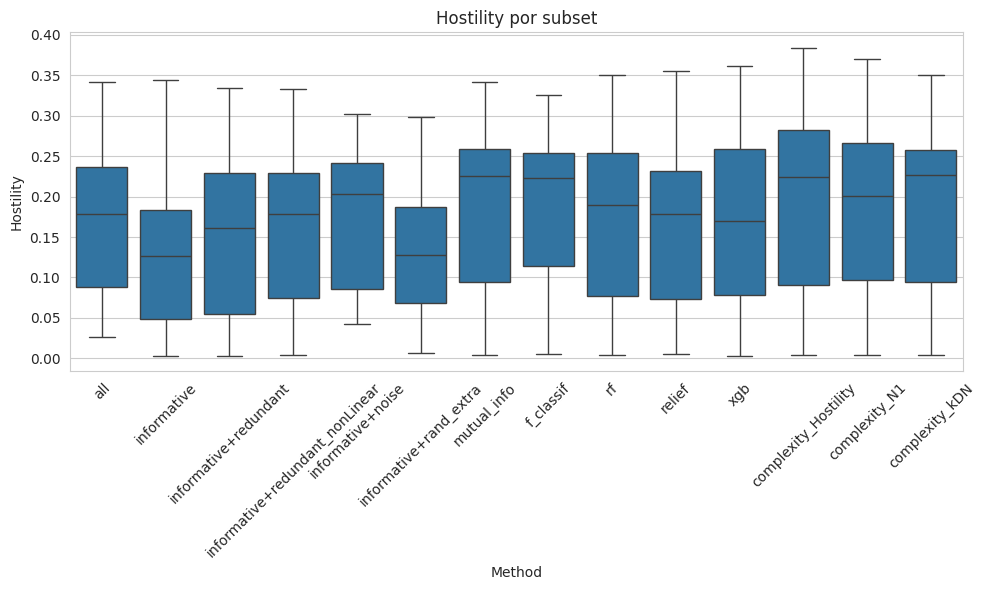

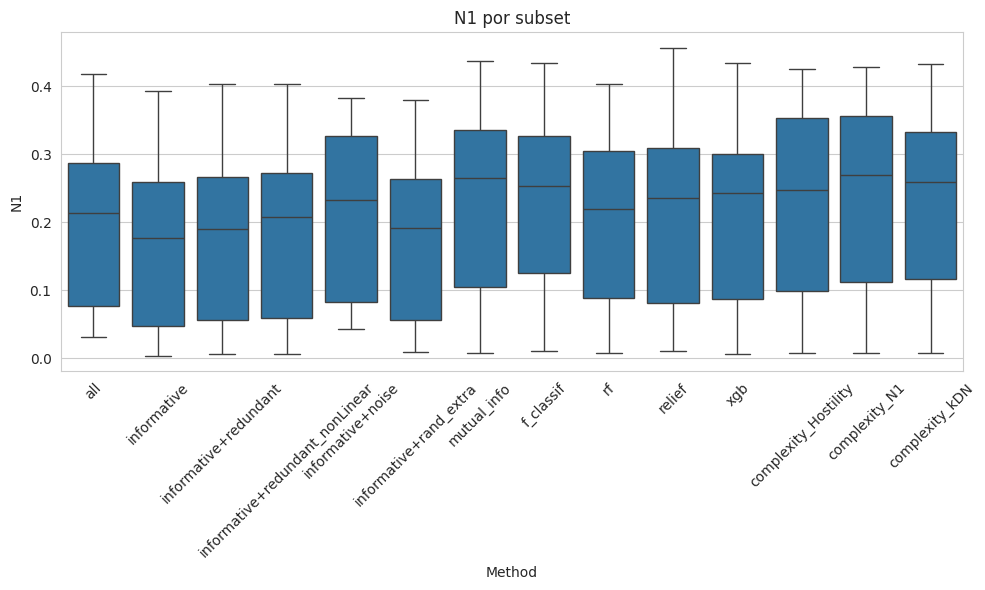

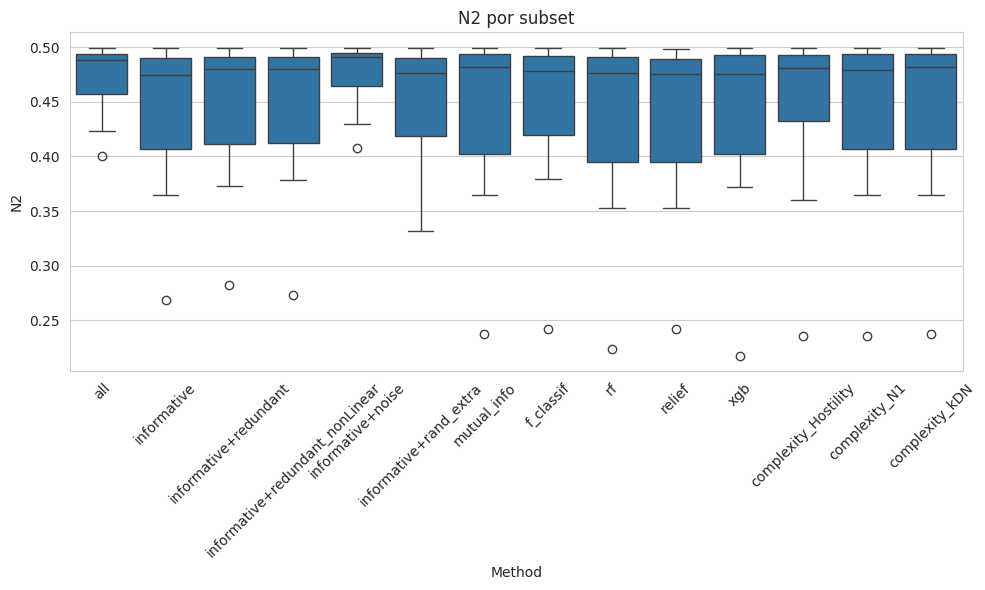

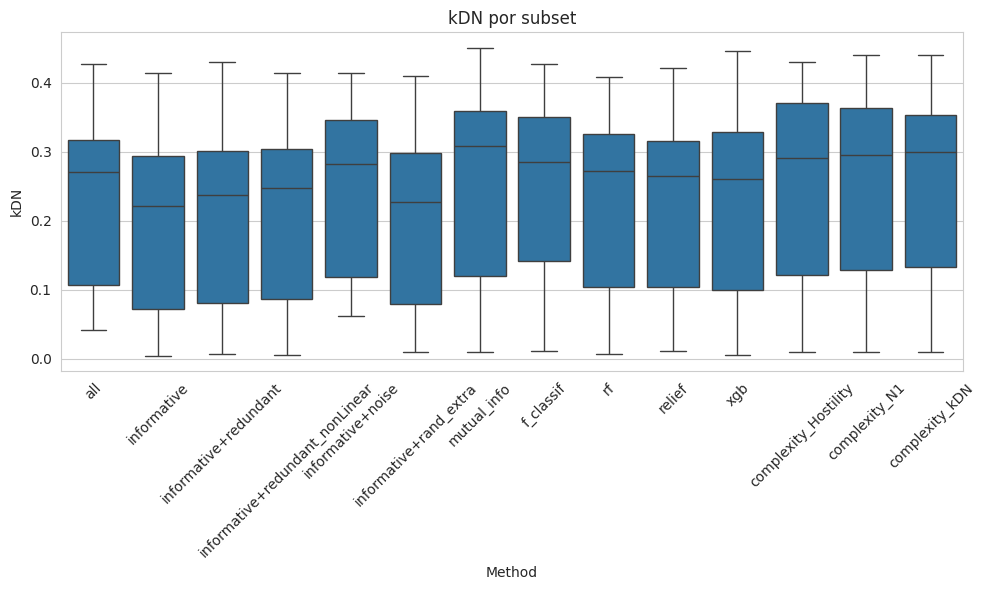

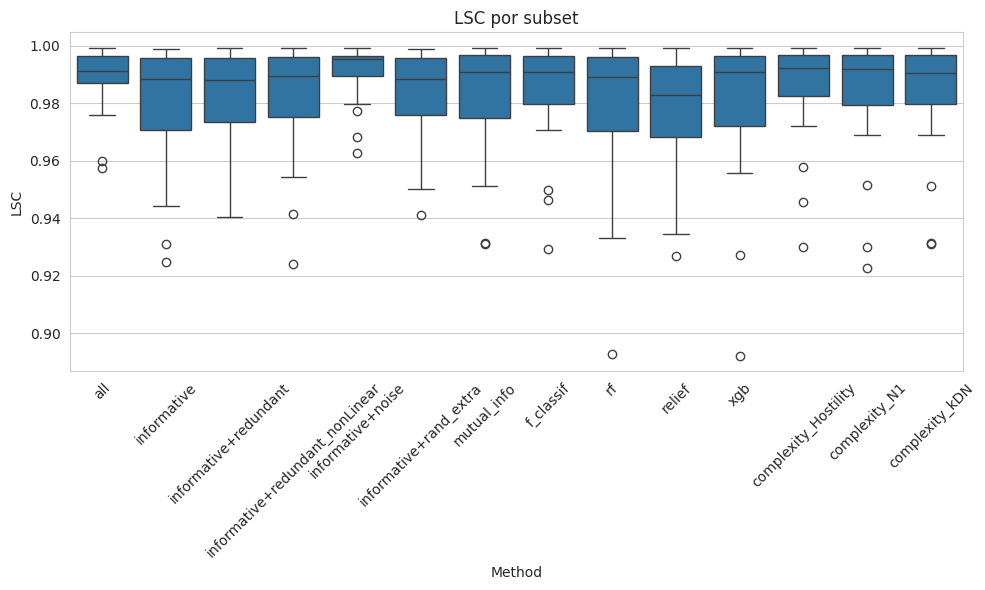

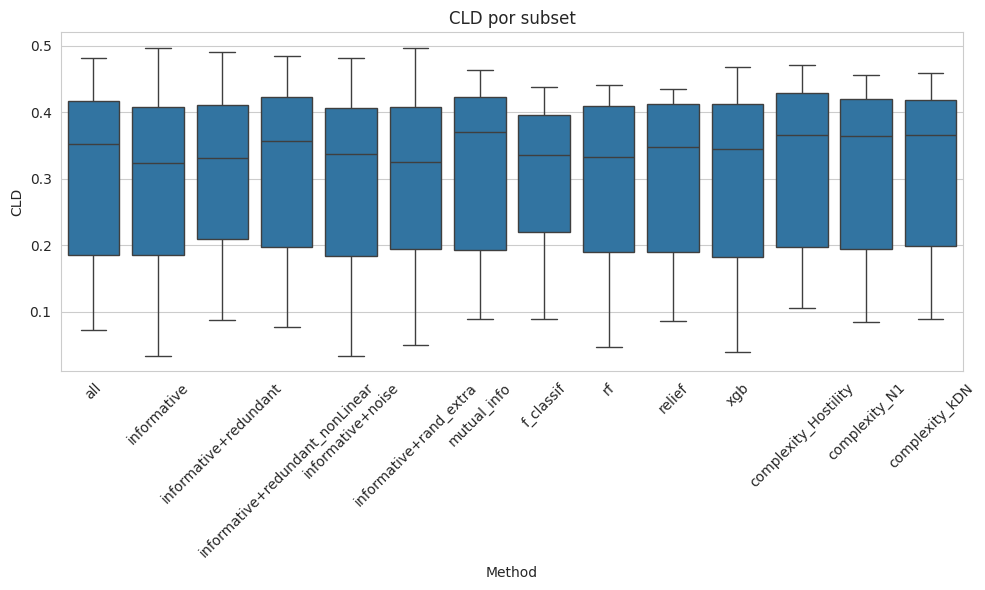

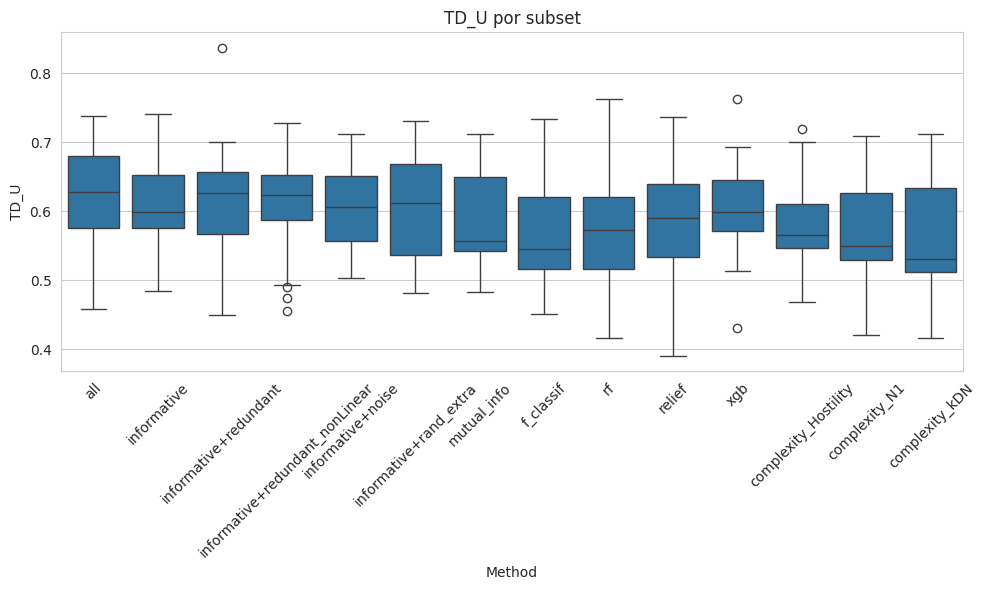

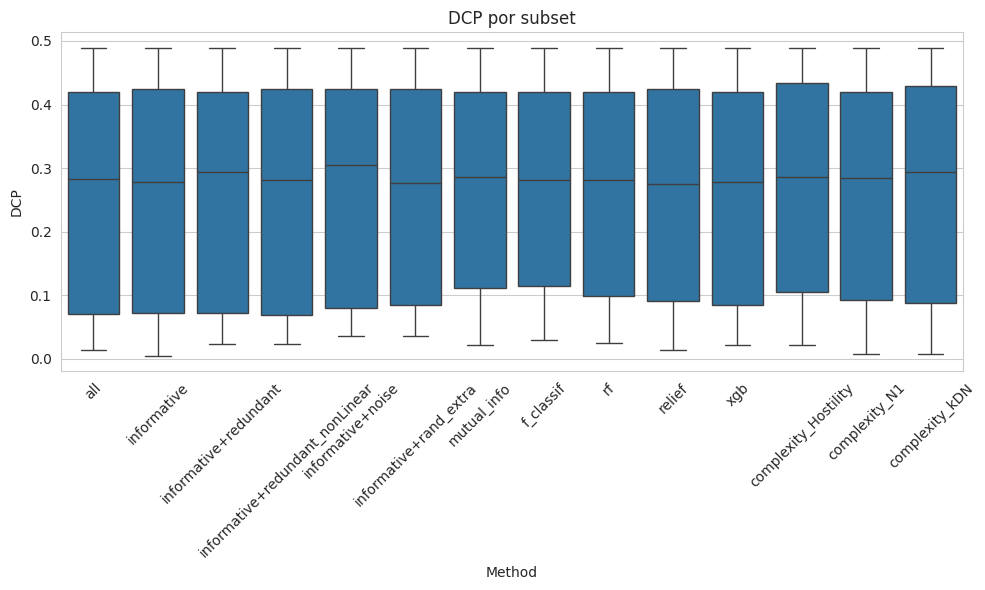

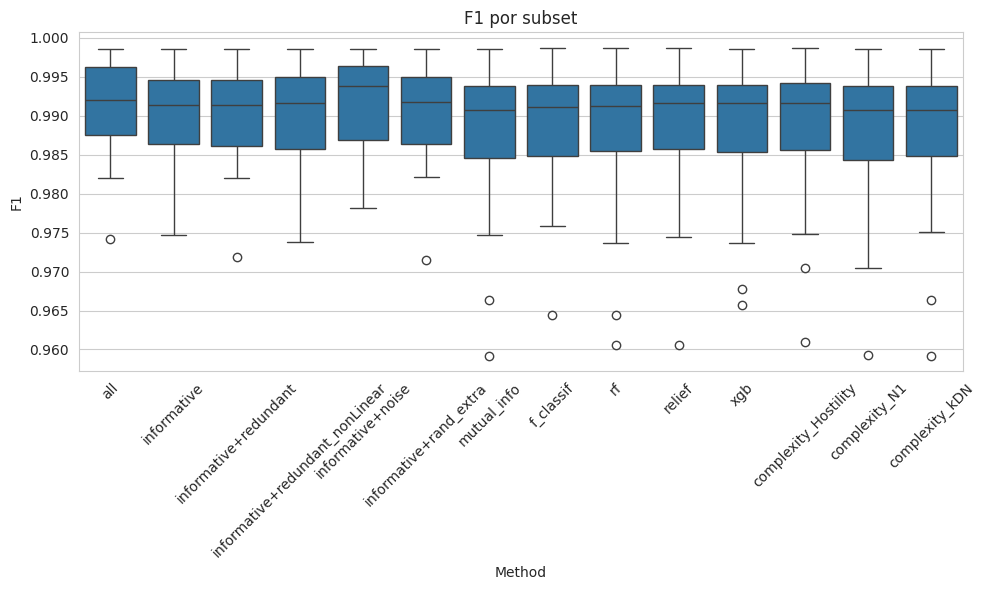

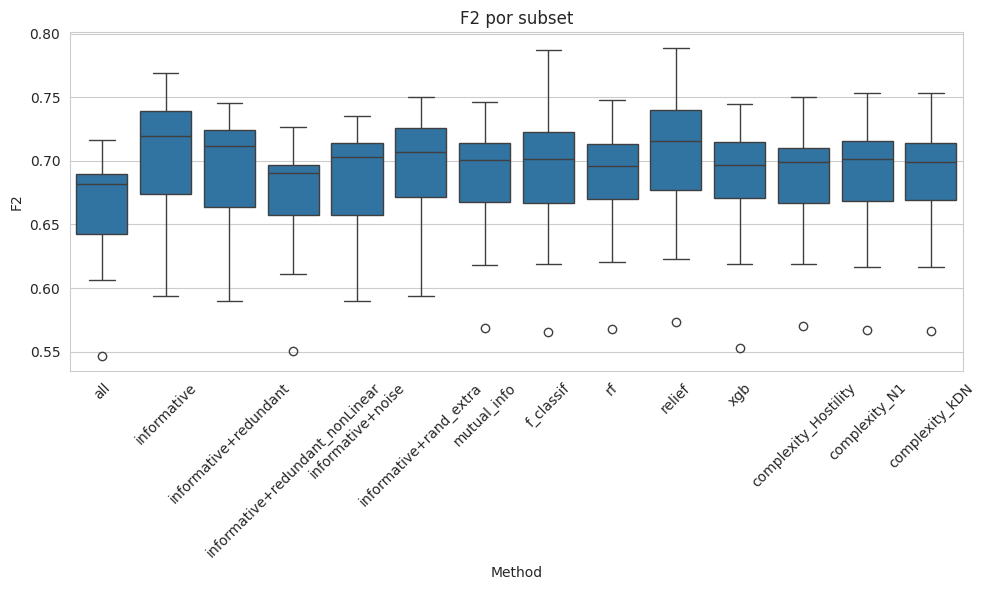

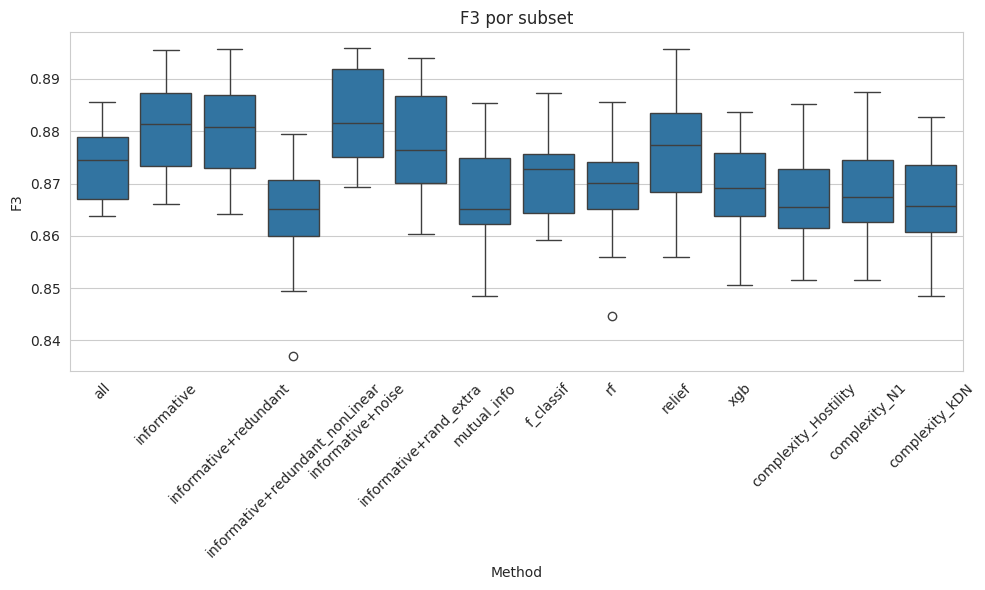

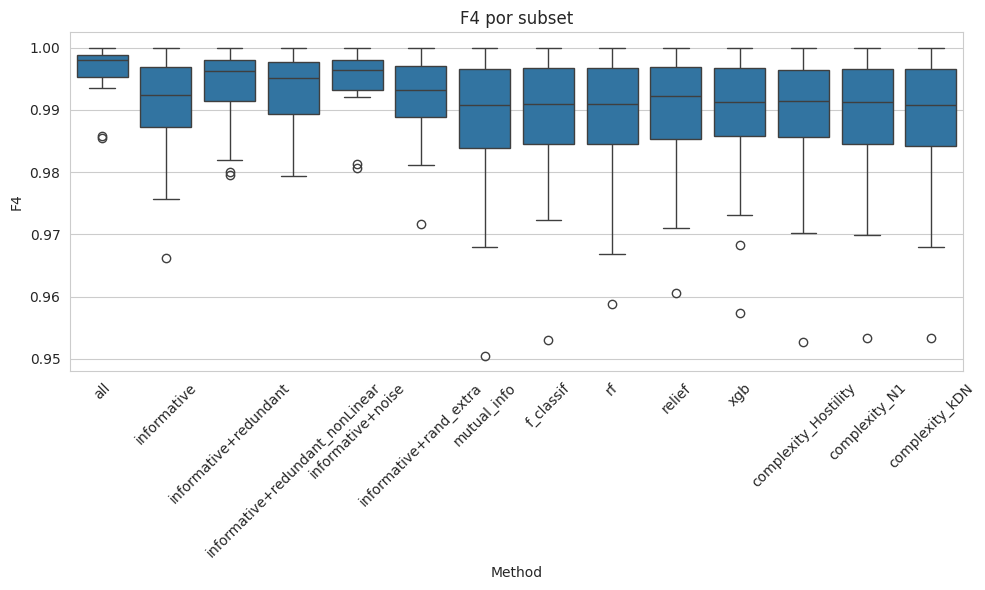

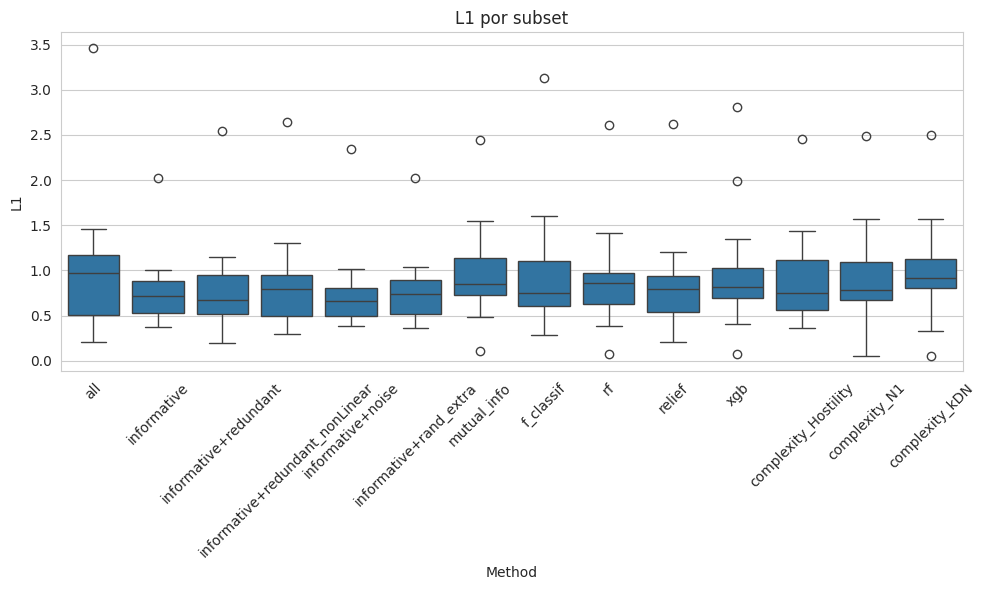

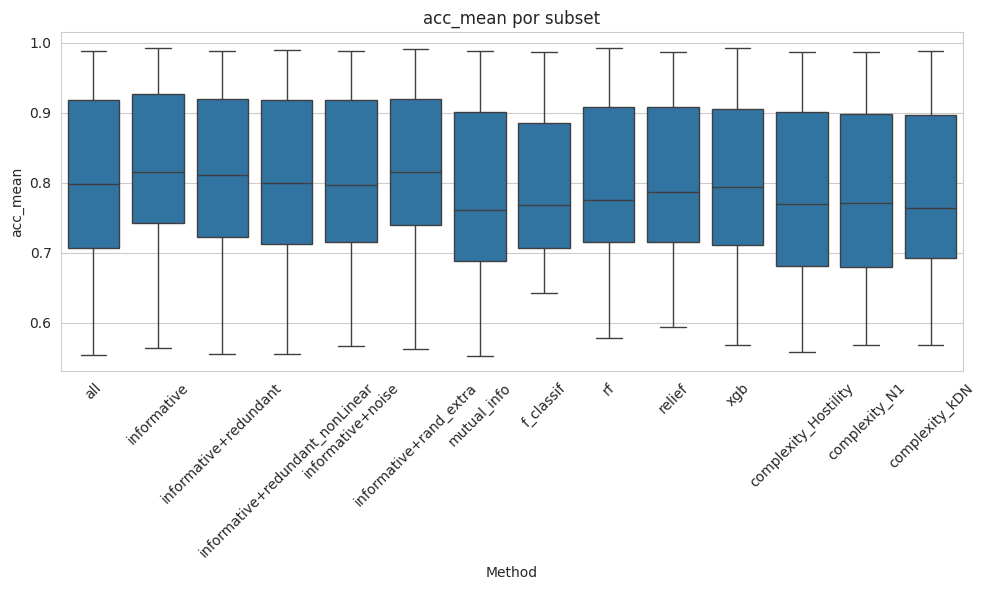

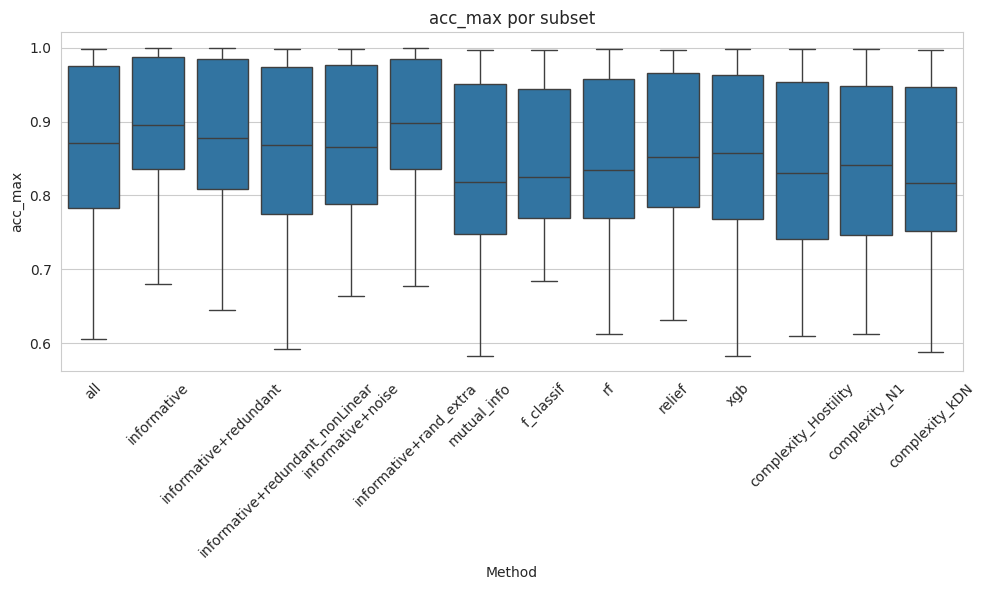

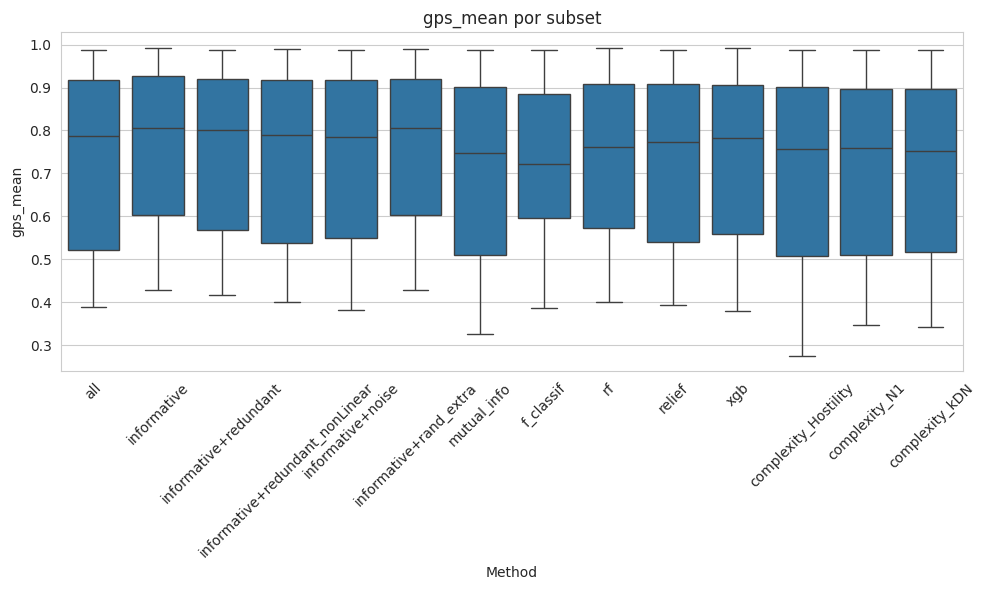

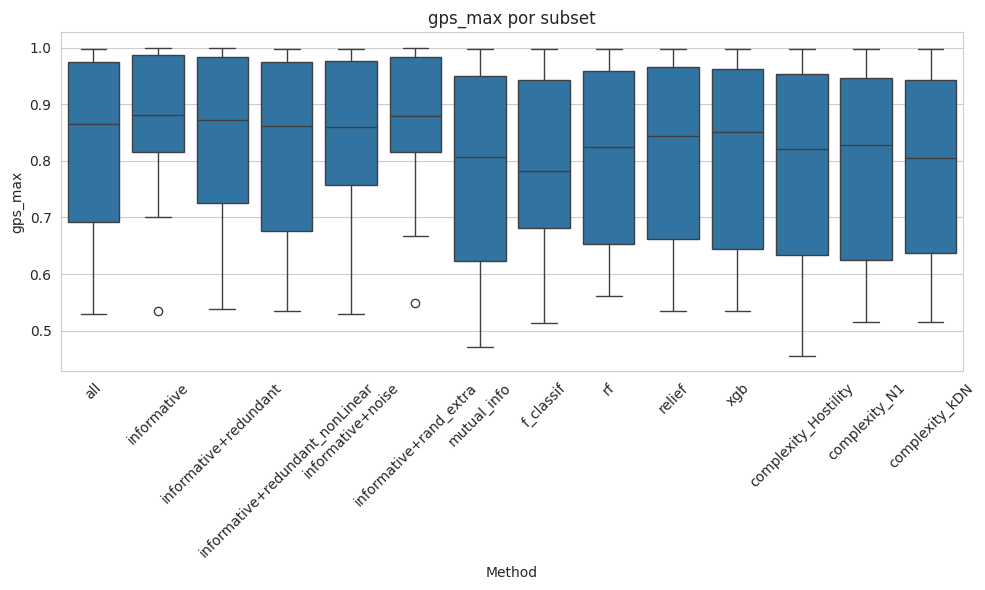

In [35]:
for measure in ["Hostility","N1","N2","kDN","LSC","CLD","TD_U","DCP","F1","F2","F3","F4","L1","acc_mean","acc_max",'gps_mean','gps_max']:
    plot_boxplots(combined, measure)
    # plot_boxplots(combined, measure, savepath=f"boxplot_{measure}.png")

## Conclusiones generales

Las medidas que mejor funcionan son claramente: Hostility, N1 y kDN. Obtienen menor media, mediana y std para el conjunto informativo real de variables. Aunque es verdad que a veces la complejidad del subconjunto realmente informativo y del informativo + algún tipo de redundancia es similar.
Hostility y N1 (se basa en MST, hay un paper que hace FS aplicando clustering con MST) tienen un mayor coste computacional que kDN. El resto de medidas están un poco perdidas.

Vemos que estas medidas sí son capaces de identificar que el conjunto de variables informativas tiene una complejidad menor que el resto de subconjuntos. Ojo porque todas son medidas de neighborhood, no son de Feature. Esto es interesante porque no están enfocadas en eso, pero revela que detectan bien la estructura de los datos y la interrelación entre las clases.

Otra observación interesante es que ninguno de los métodos de filtro de FS del SOTA probados  logran una complejidad similar a la del subconjunto realmente informativo. RelieF y RF son los que mejores valores de complejidad (en el sentido de aproximarse a los valores de complejidad logrados por el subconjunto realmente informativo). Los  boxplots de accuracy y gps que arrojan muestran mucha varianza y un rango mayor que el que se logra con todas las variables.


El filtro univariante con las medidas de complejidad funciona fatal. Seleccionan un subconjunto de variables que tiene una complejidad mayor que la del total de los datos a veces. Es más alta que la complejidad de los susbsets que eligen los métodos del SOTA --> Claramente el enfoque de evaluación de complejidad univariante y ranking no es bueno. Tiene sentido porque realmente lo que hemos visto hasta ahora es que lo pilla de forma multivariante, es decir, cuando las evalúa juntas.

Siguientes pasos:

   - Evaluar la complejidad a nivel instancia de las variables para ver si podemos sacar correlación o algo así. En mi cabeza cuadra que las variables redundantes otorguen una complejidad a nivel instancia similar y entonces deberíamos poder pillarlo. No es lo mismo correlación entre variables que correlación entre la complejidad de las instancias otorgadas por distintas variables.
   - Probar enfoque multivariante:
      - Como ya tenemos un ranking, ir metiendo en el orden del ranking (en plan forward selection) y parar cuando la disminución de complejidad no merezca la pena.
      - Con el mismo ranking, también podríamos empezar con todas e ir hacia atrás, aunque lo veo más problemático.
   - Con la información de complejidad a nivel instancia que tenemos, hacer traspuesta de datos. Entonces cada "variable" sería una instancia y cada instancia sería una variable. Con eso ya hemos reducido el problema de muchas variables (pues si tenemos muchas observaciones originales, tomamos una muestra y listo) y con eso hacer algún clustering para seleccionar representantes que, en este caso, serían  variables.
   - Probar idea de muestreo de variables para ir seleccionando.